# Ali Darabi - 810100264

# Exploratory Data Analysis

In [577]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
data_frame = pd.read_csv('marketing_campaign.csv')

In [578]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

In [579]:
data_frame.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [580]:
total_count = data_frame.shape[0]
feature_count = data_frame.notnull().sum()[1:]
feature_missing_count = {key: total_count - value for key,value in feature_count.items()}
feature_missing_ratio = {key: (total_count - value)/total_count for key,value in feature_count.items()}
missing_data_frame = pd.DataFrame({'MissingCount': feature_missing_count, 'MissingRatio': feature_missing_ratio})
missing_data_frame

,MissingCount,MissingRatio
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,223,0.099554
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000
MntCoffee,205,0.091518


Text(0, 0.5, 'Counts')

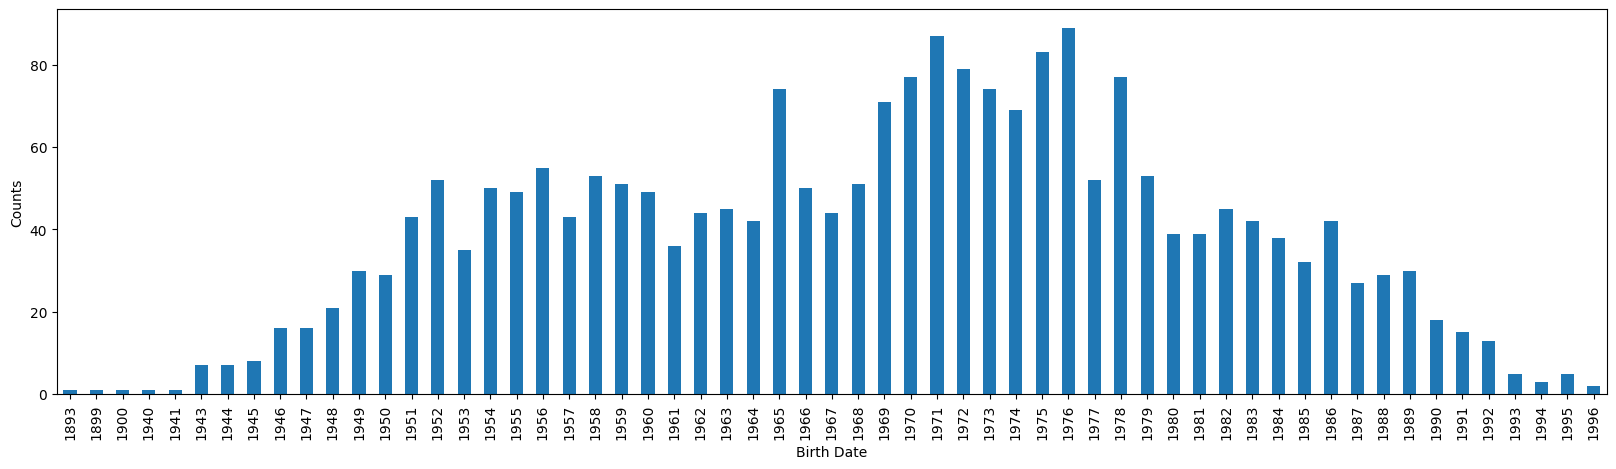

In [581]:
birth_counts = data_frame['Year_Birth'].value_counts()
plt.figure(figsize=(20, 5))
birth_counts.sort_index().plot(kind='bar')
plt.xlabel("Birth Date")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

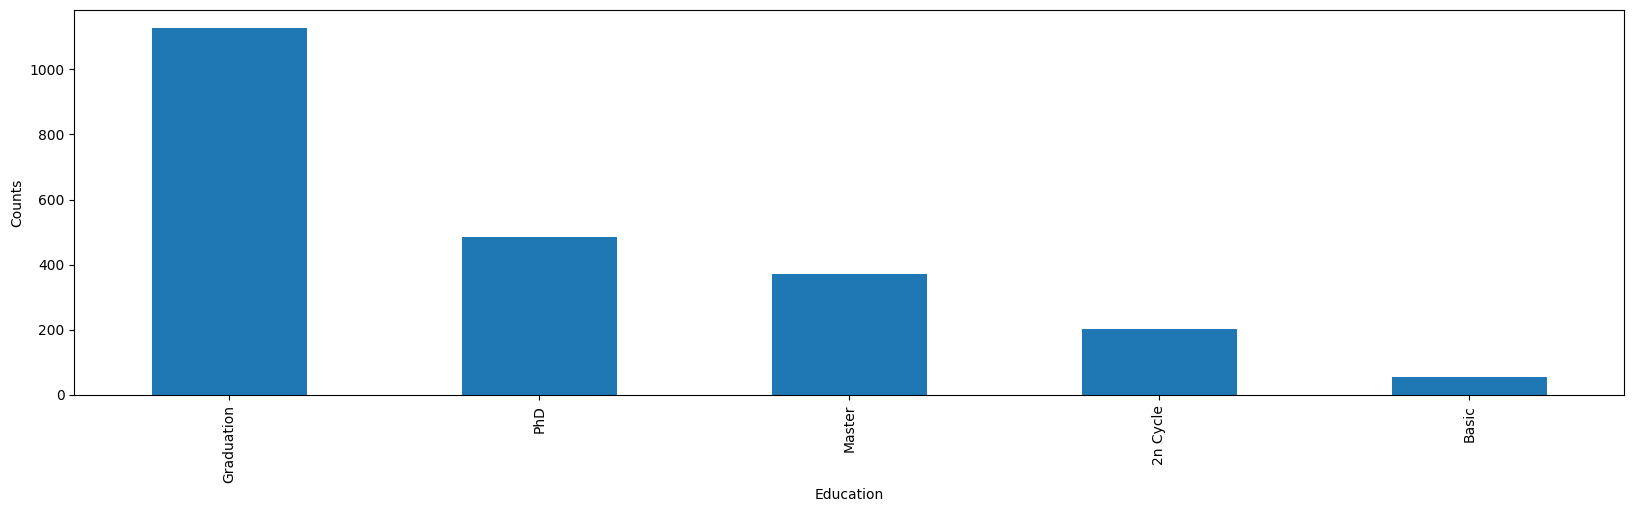

In [582]:
education_counts = data_frame['Education'].value_counts()
plt.figure(figsize=(20, 5))
education_counts.plot(kind='bar')
plt.xlabel("Education")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

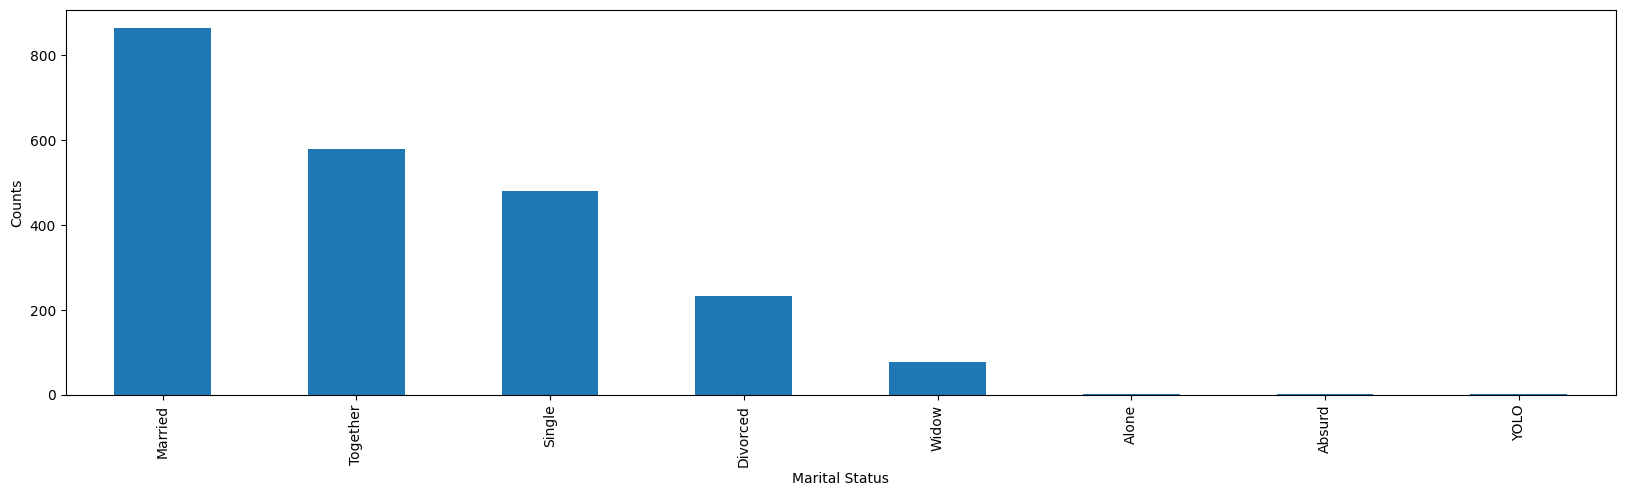

In [583]:
marital_status_counts = data_frame['Marital_Status'].value_counts()
plt.figure(figsize=(20, 5))
marital_status_counts.plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

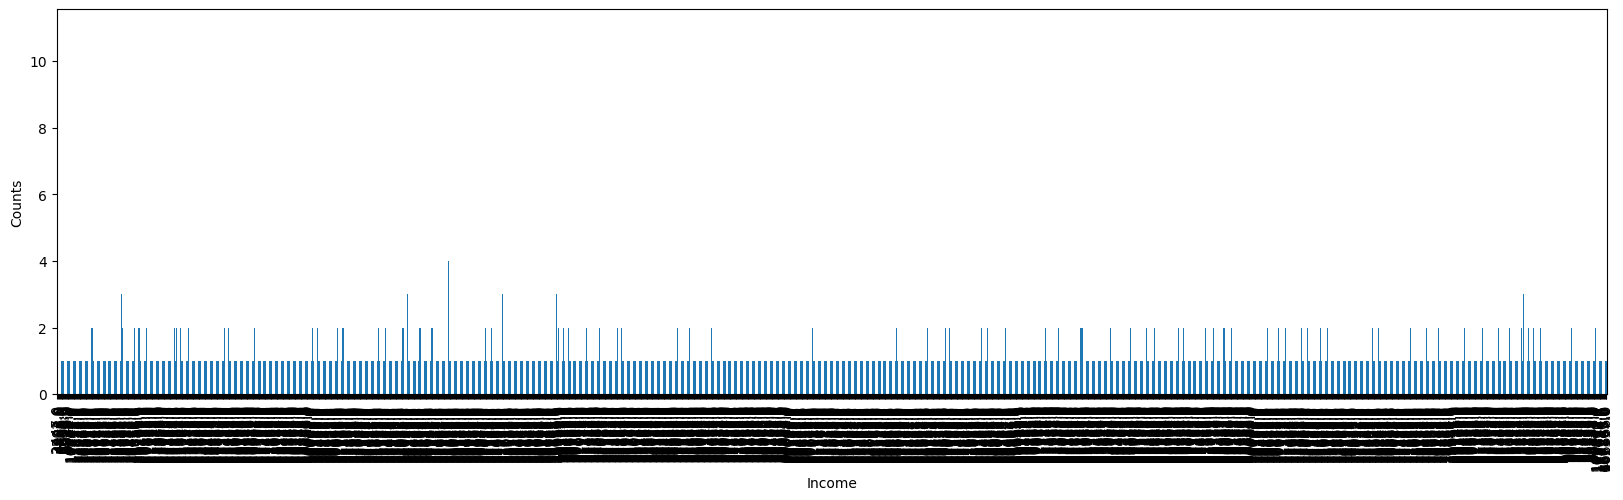

In [584]:
Income_counts = data_frame['Income'].value_counts()
plt.figure(figsize=(20, 5))
Income_counts.sort_index().plot(kind='bar')
plt.xlabel("Income")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

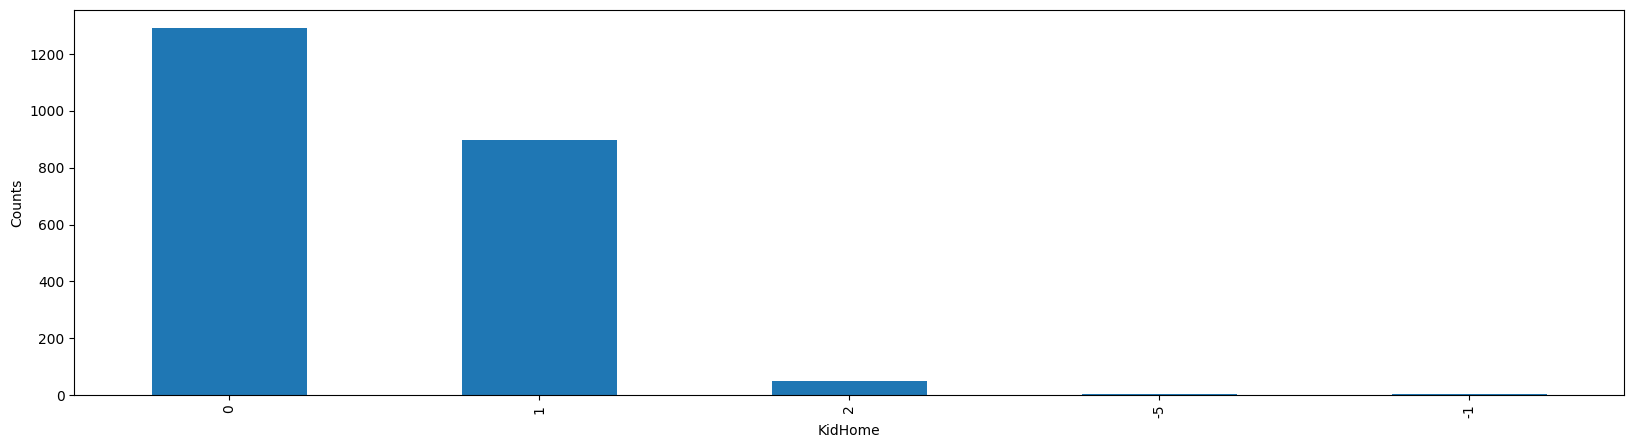

In [585]:
kidhome_counts = data_frame['Kidhome'].value_counts()
plt.figure(figsize=(20, 5))
kidhome_counts.plot(kind='bar')
plt.xlabel("KidHome")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

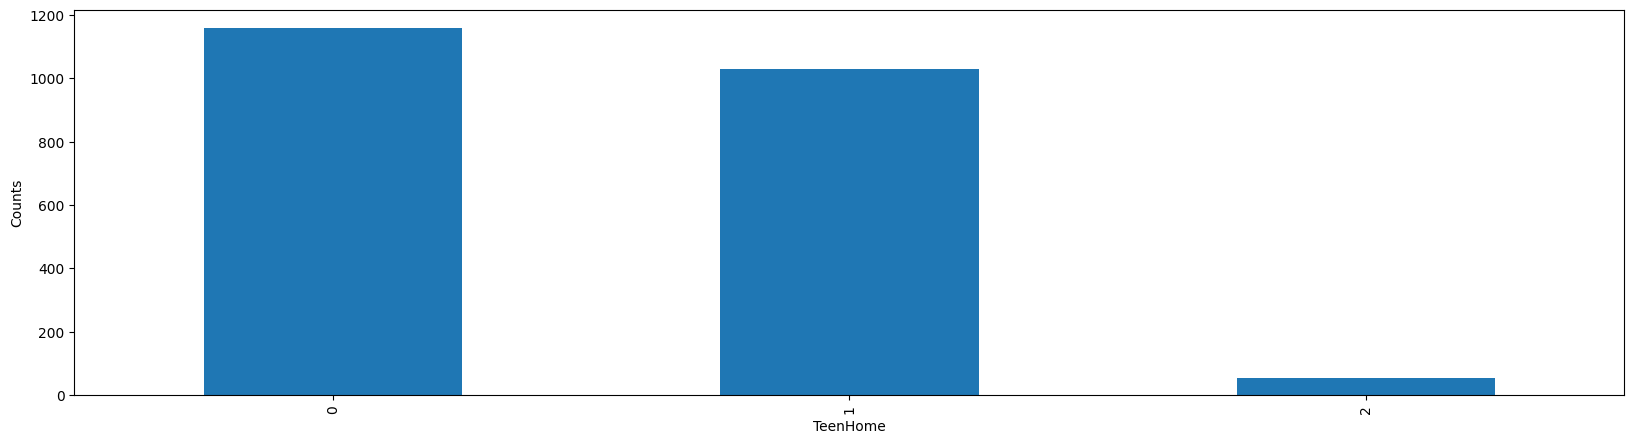

In [586]:
Teenhome_counts = data_frame['Teenhome'].value_counts()
plt.figure(figsize=(20, 5))
Teenhome_counts.plot(kind='bar')
plt.xlabel("TeenHome")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

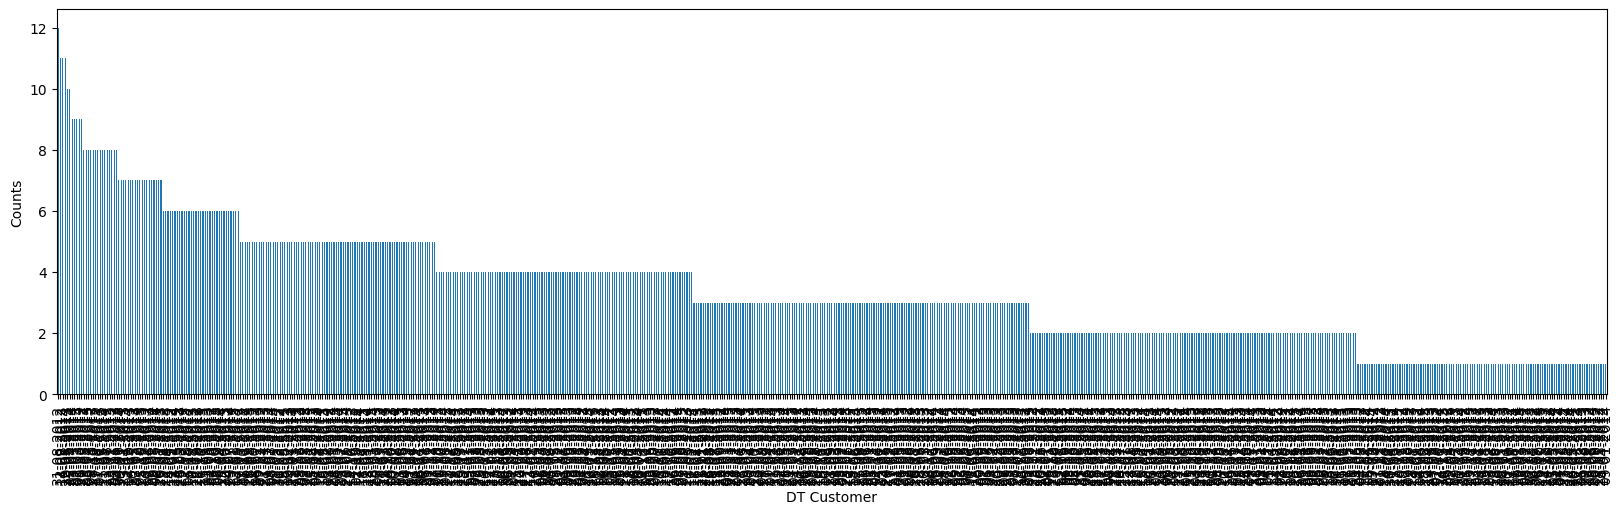

In [587]:
DT_Customer_counts = data_frame['Dt_Customer'].value_counts()
plt.figure(figsize=(20, 5))
DT_Customer_counts.plot(kind='bar')
plt.xlabel("DT Customer")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

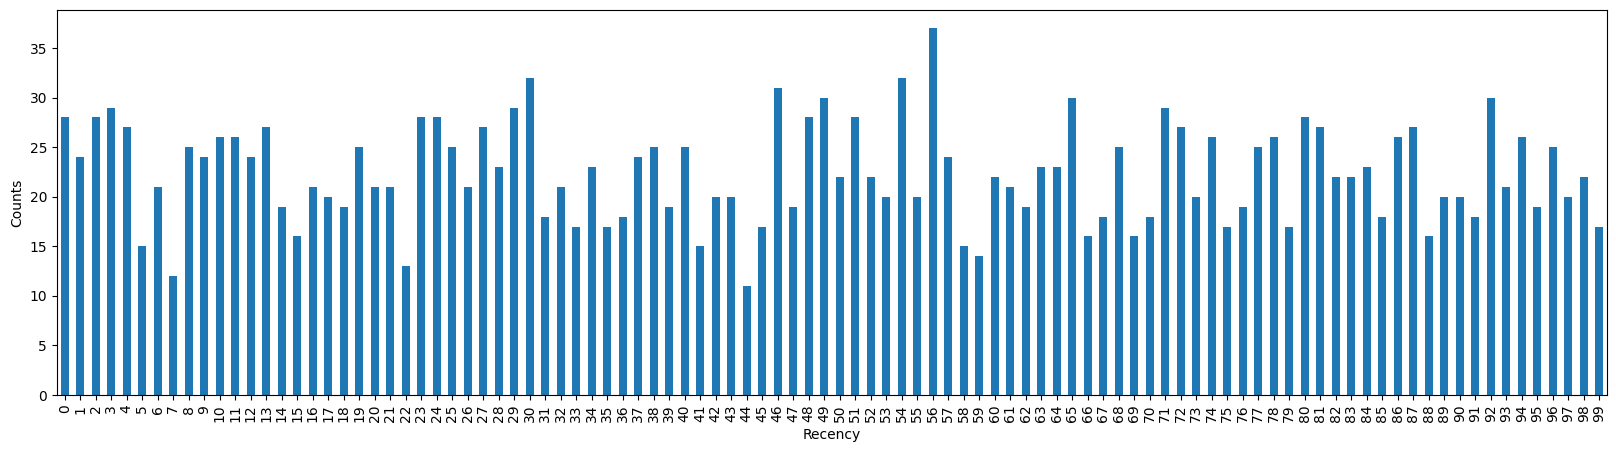

In [588]:
Recency_counts = data_frame['Recency'].value_counts()
plt.figure(figsize=(20, 5))
Recency_counts.sort_index().plot(kind='bar')
plt.xlabel("Recency")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

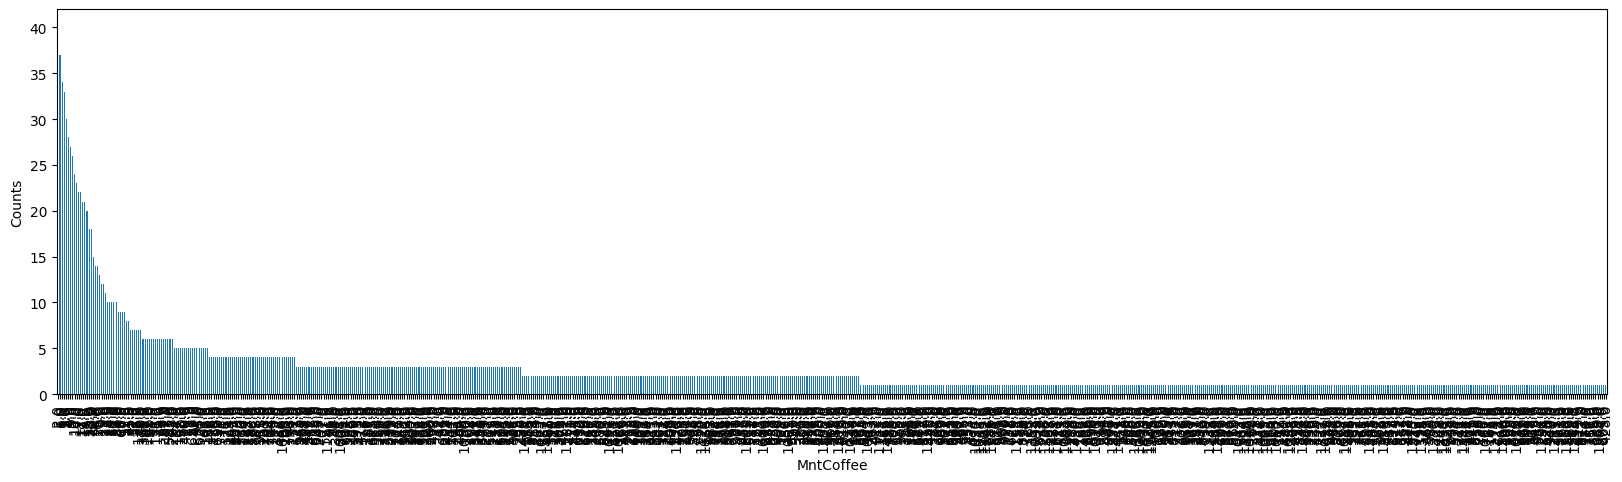

In [589]:
MntCoffee_counts = data_frame['MntCoffee'].value_counts()
plt.figure(figsize=(20, 5))
MntCoffee_counts.plot(kind='bar')
plt.xlabel("MntCoffee")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

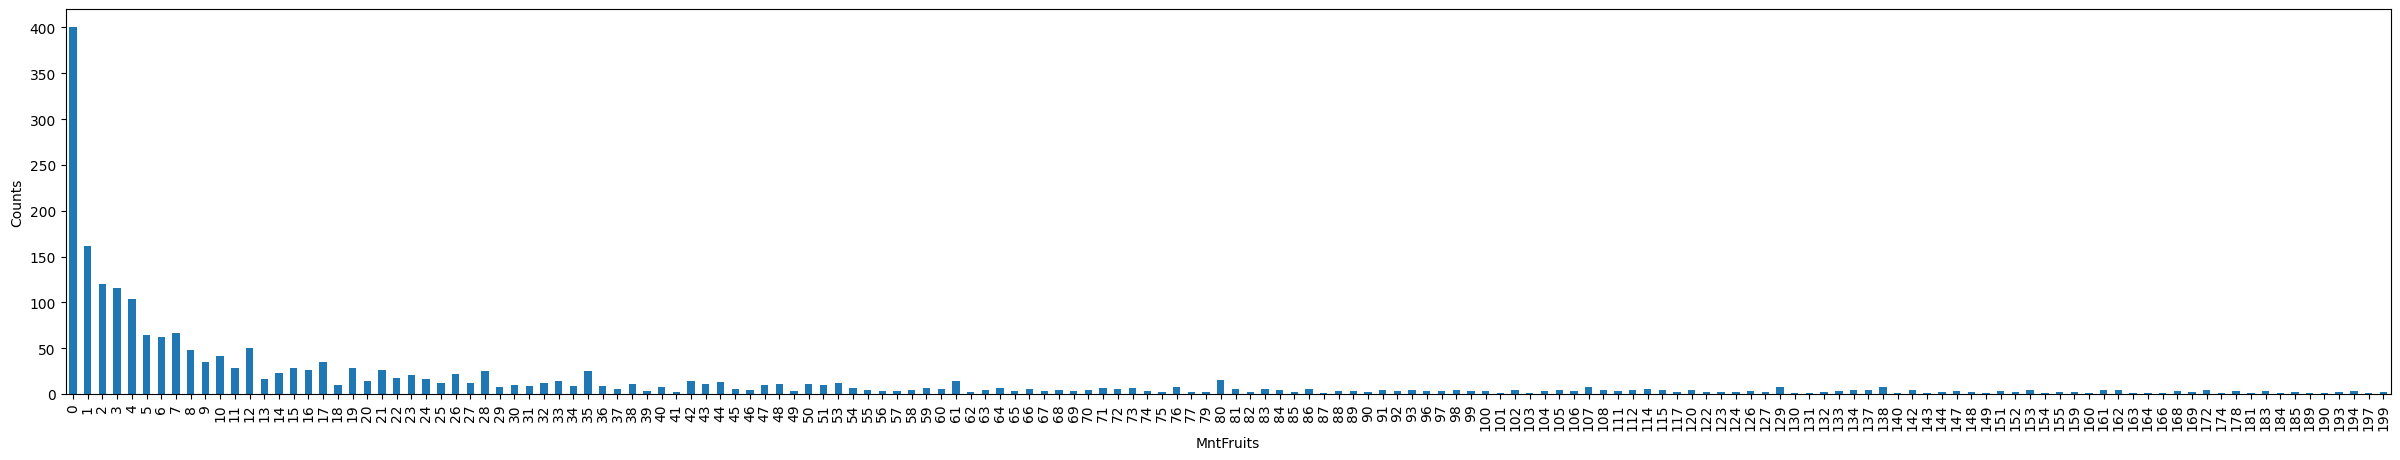

In [590]:
MntFruits_counts = data_frame['MntFruits'].value_counts()
plt.figure(figsize=(30, 5))
MntFruits_counts.sort_index().plot(kind='bar')
plt.xlabel("MntFruits")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

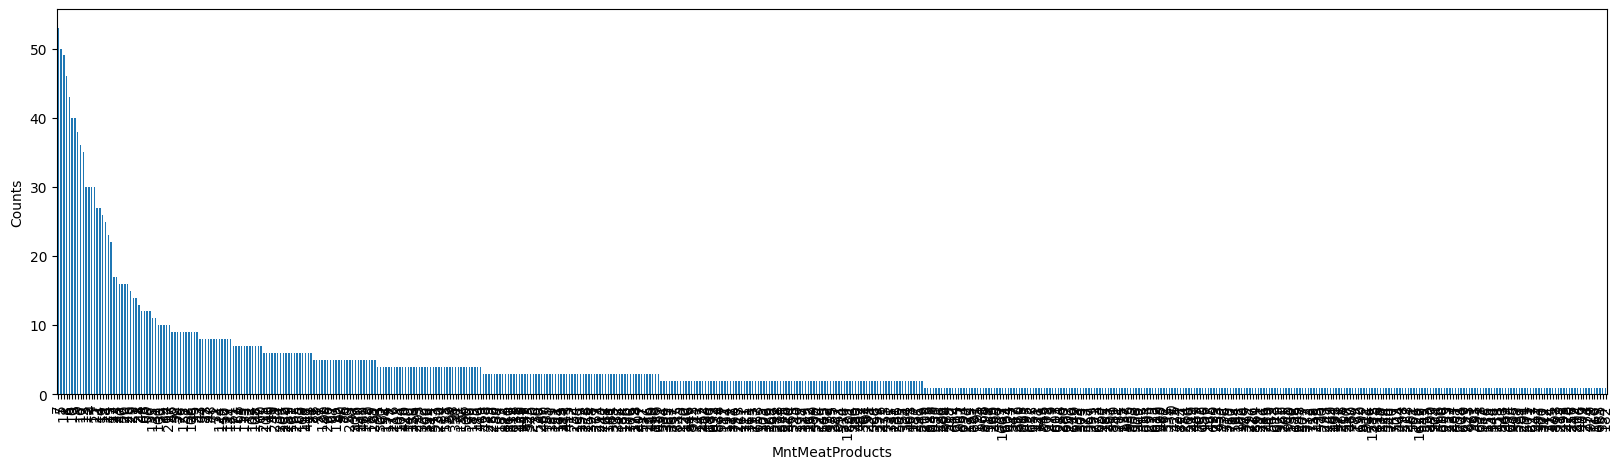

In [591]:
MntMeatProducts_counts = data_frame['MntMeatProducts'].value_counts()
plt.figure(figsize=(20, 5))
MntMeatProducts_counts.plot(kind='bar')
plt.xlabel("MntMeatProducts")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

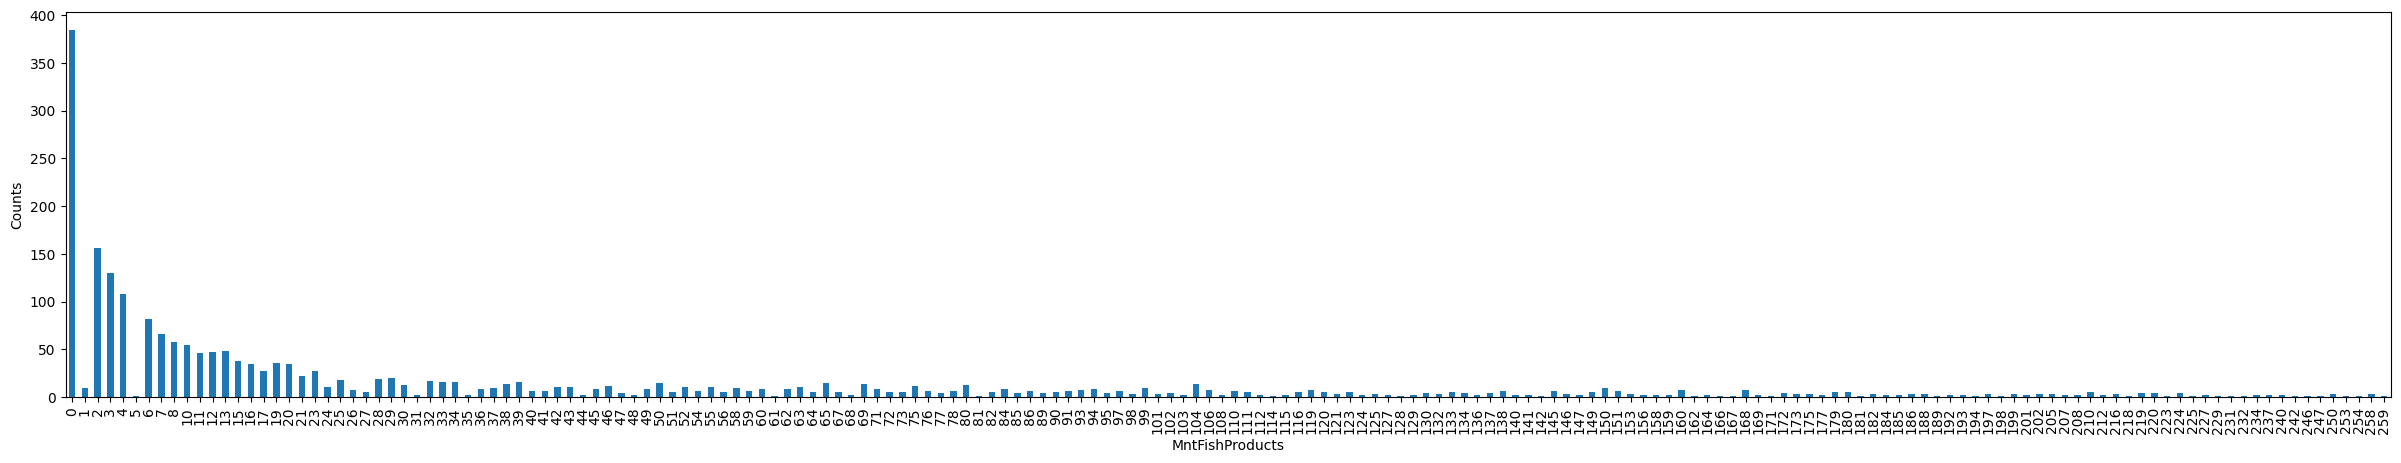

In [592]:
MntFishProducts_counts = data_frame['MntFishProducts'].value_counts()
plt.figure(figsize=(30, 5))
MntFishProducts_counts.sort_index().plot(kind='bar')
plt.xlabel("MntFishProducts")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

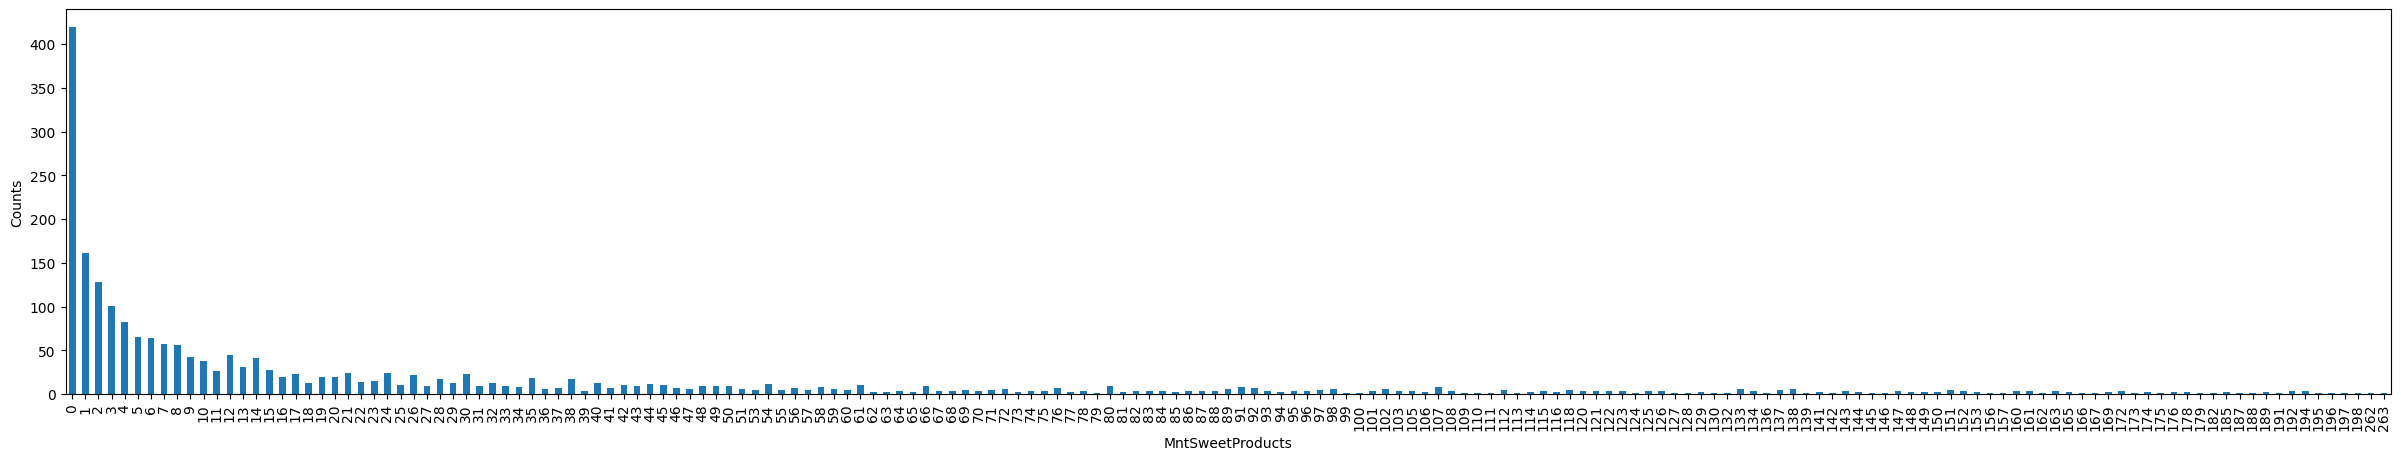

In [593]:
MntSweetProducts_counts = data_frame['MntSweetProducts'].value_counts()
plt.figure(figsize=(30, 5))
MntSweetProducts_counts.sort_index().plot(kind='bar')
plt.xlabel("MntSweetProducts")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

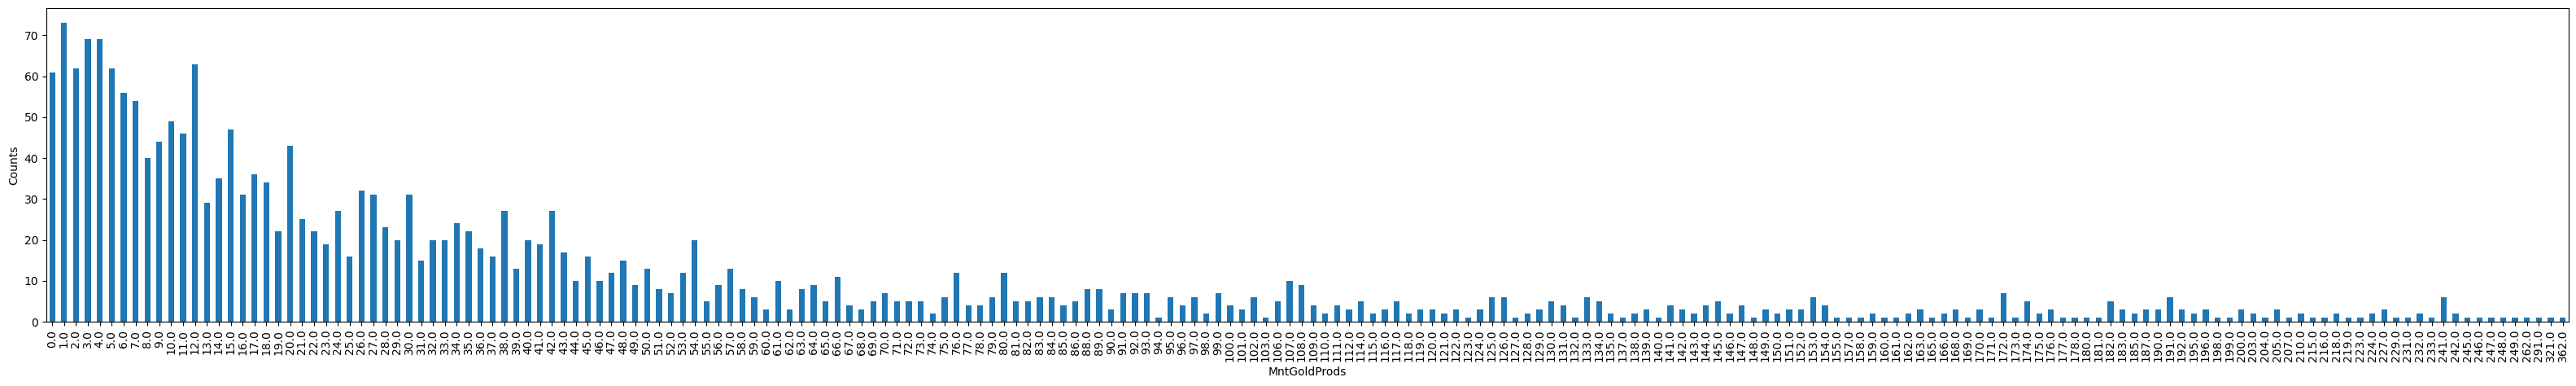

In [594]:
MntGoldProds_counts = data_frame['MntGoldProds'].value_counts()
plt.figure(figsize=(40, 5))
MntGoldProds_counts.sort_index().plot(kind='bar')
plt.xlabel("MntGoldProds")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

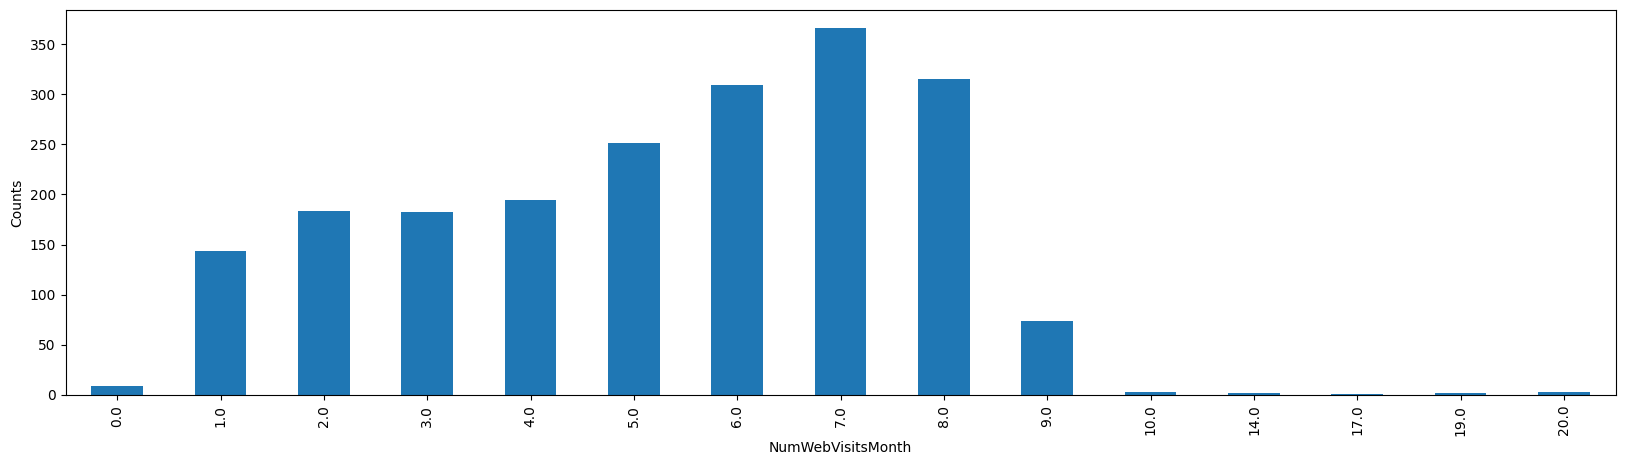

In [595]:
NumWebVisitsMonth_counts = data_frame['NumWebVisitsMonth'].value_counts()
plt.figure(figsize=(20, 5))
NumWebVisitsMonth_counts.sort_index().plot(kind='bar')
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

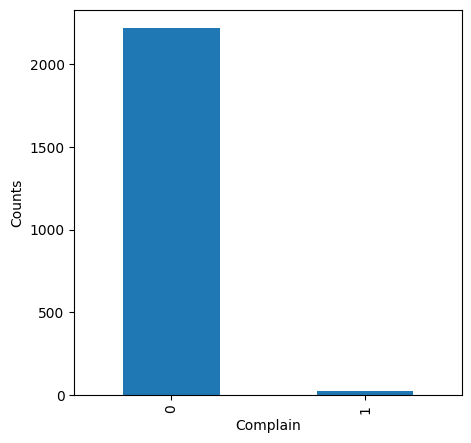

In [596]:
Complain_counts = data_frame['Complain'].value_counts()
plt.figure(figsize=(5, 5))
Complain_counts.plot(kind='bar')
plt.xlabel("Complain")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

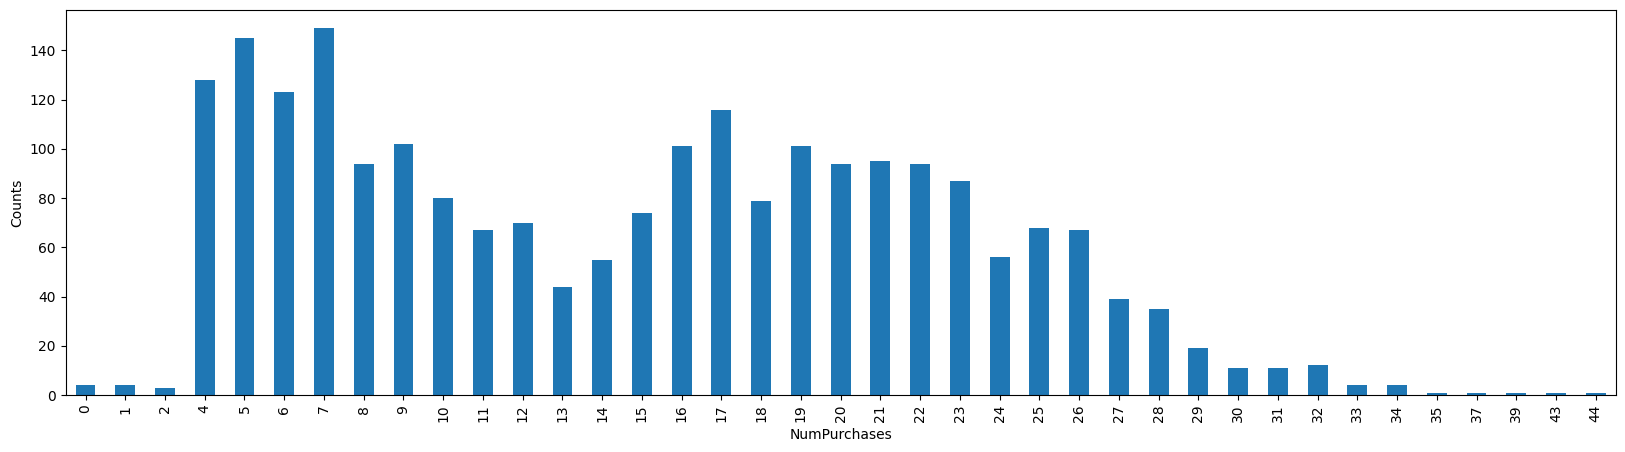

In [597]:
NumPurchases_counts = data_frame['NumPurchases'].value_counts()
plt.figure(figsize=(20, 5))
NumPurchases_counts.sort_index().plot(kind='bar')
plt.xlabel("NumPurchases")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

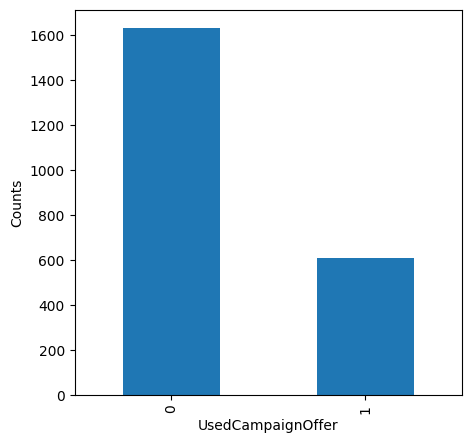

In [598]:
UsedCampaignOffer_counts = data_frame['UsedCampaignOffer'].value_counts()
plt.figure(figsize=(5, 5))
UsedCampaignOffer_counts.plot(kind='bar')
plt.xlabel("UsedCampaignOffer")
plt.ylabel("Counts")

<Axes: xlabel='UsedCampaignOffer', ylabel='NumPurchases'>

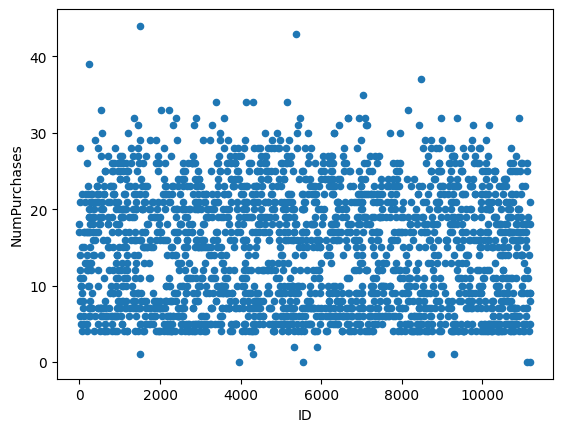

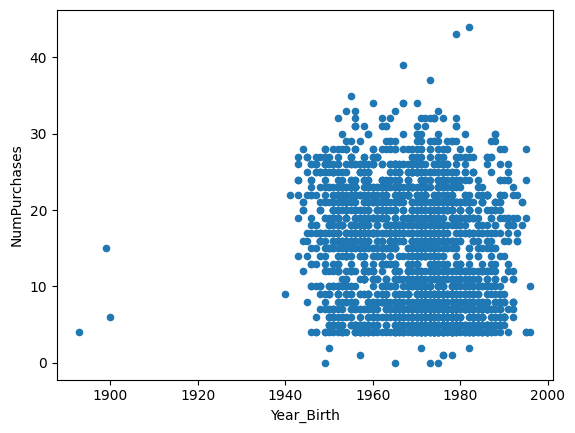

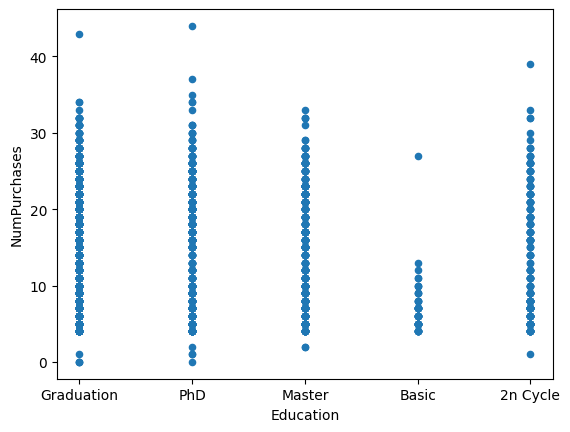

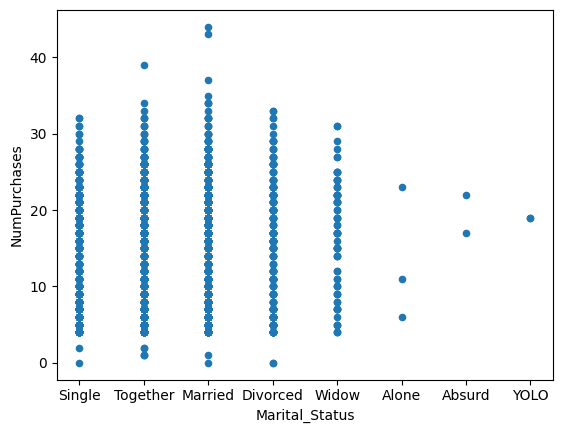

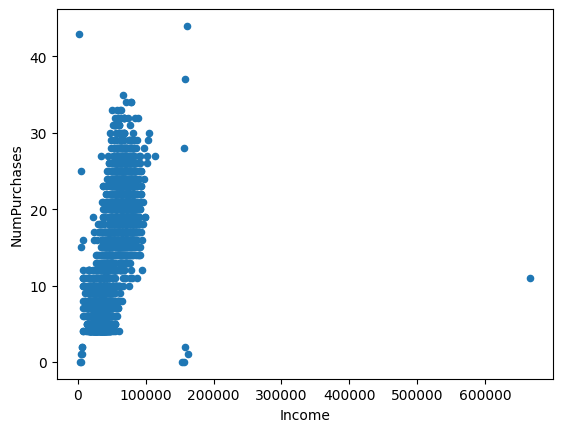

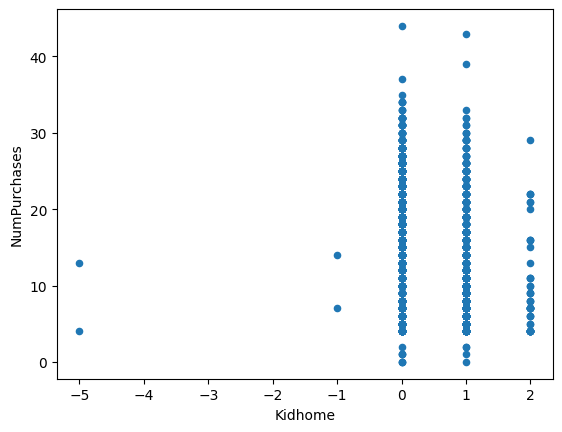

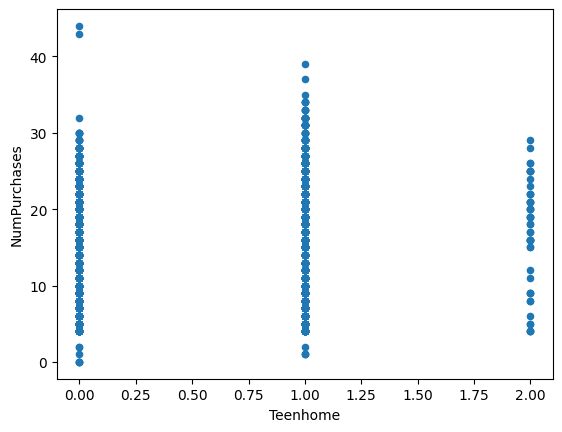

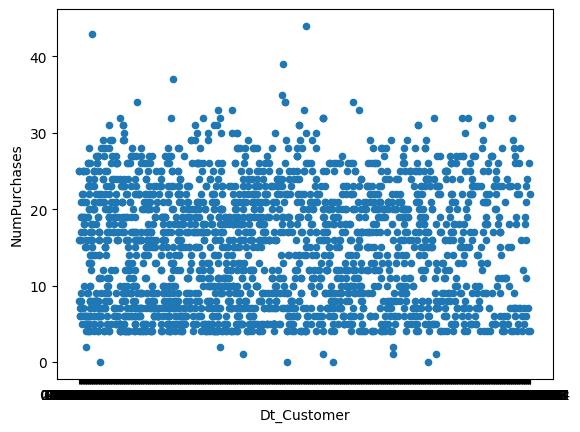

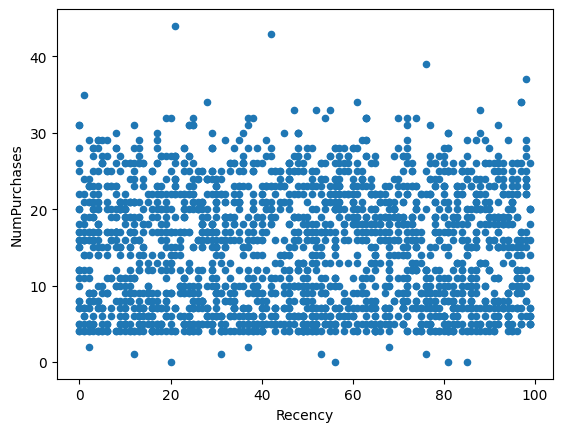

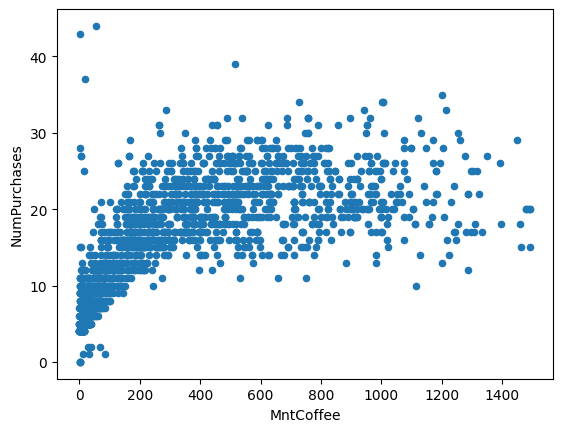

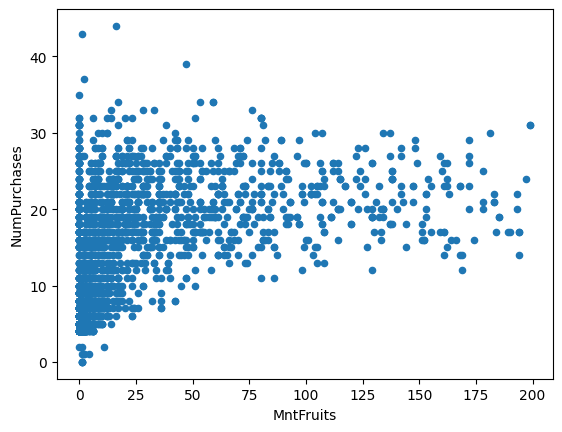

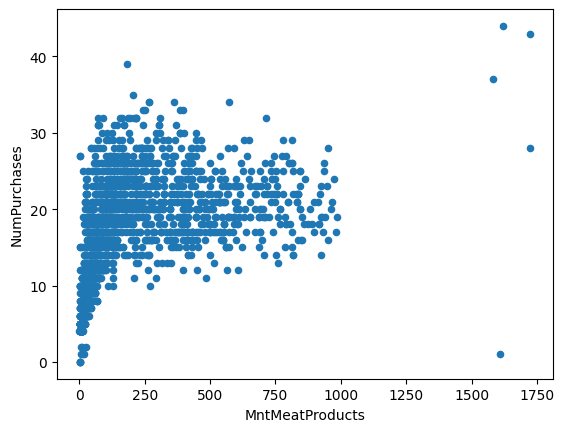

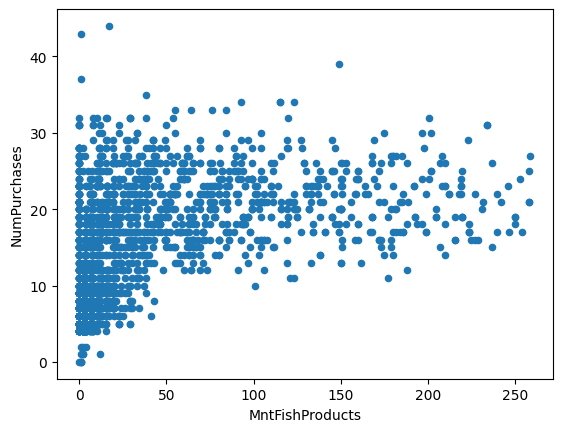

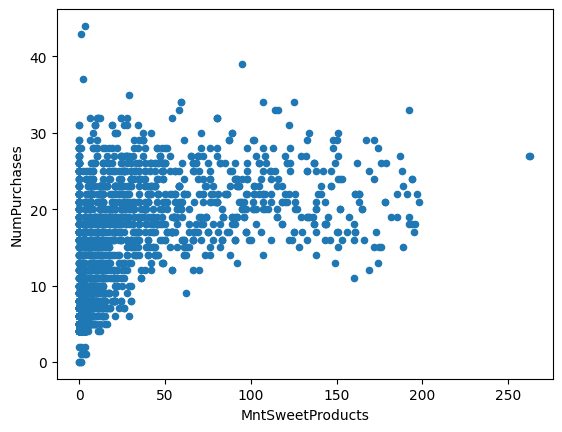

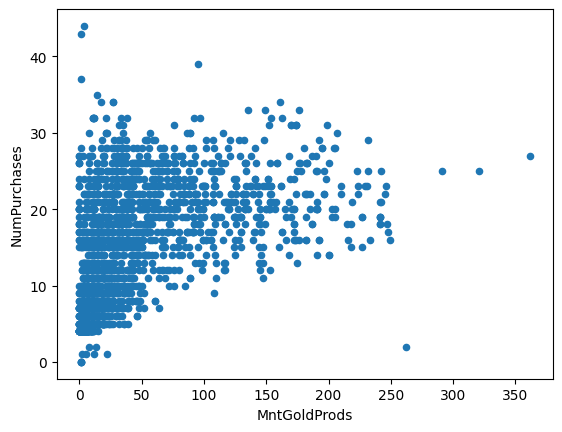

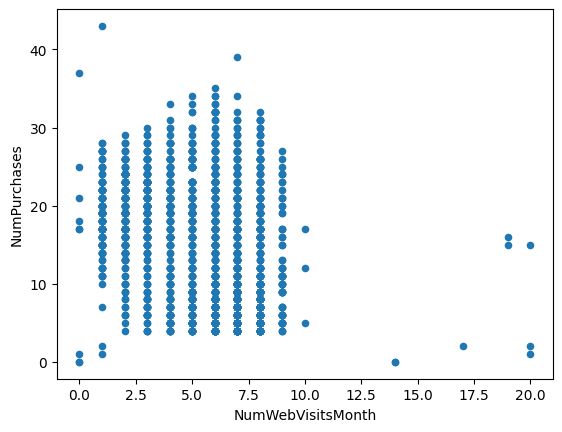

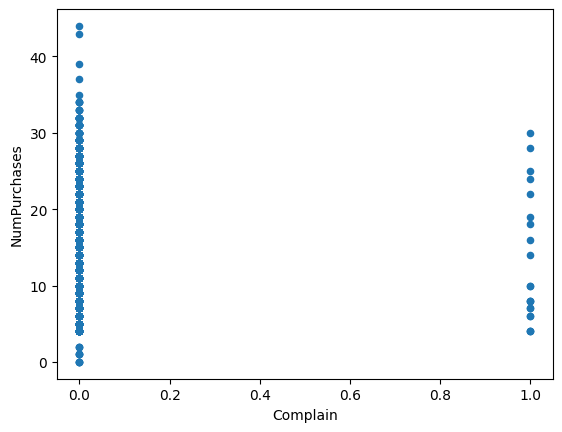

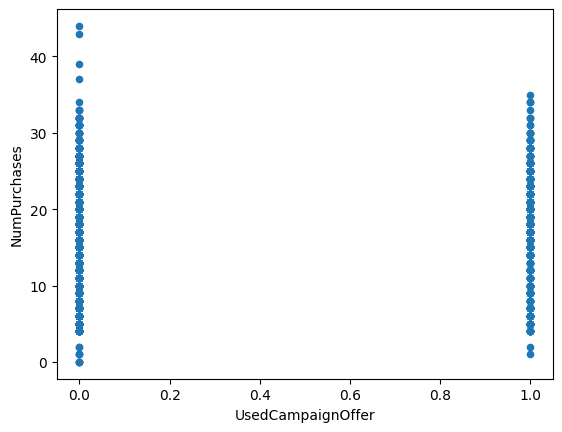

In [599]:
data_frame.plot.scatter(x='ID', y='NumPurchases')
data_frame.plot.scatter(x='Year_Birth', y='NumPurchases')
data_frame.plot.scatter(x='Education', y='NumPurchases')
data_frame.plot.scatter(x='Marital_Status', y='NumPurchases')
data_frame.plot.scatter(x='Income', y='NumPurchases')
data_frame.plot.scatter(x='Kidhome', y='NumPurchases')
data_frame.plot.scatter(x='Teenhome', y='NumPurchases')
data_frame.plot.scatter(x='Dt_Customer', y='NumPurchases')
data_frame.plot.scatter(x='Recency', y='NumPurchases')
data_frame.plot.scatter(x='MntCoffee', y='NumPurchases')
data_frame.plot.scatter(x='MntFruits', y='NumPurchases')
data_frame.plot.scatter(x='MntMeatProducts', y='NumPurchases')
data_frame.plot.scatter(x='MntFishProducts', y='NumPurchases')
data_frame.plot.scatter(x='MntSweetProducts', y='NumPurchases')
data_frame.plot.scatter(x='MntGoldProds', y='NumPurchases')
data_frame.plot.scatter(x='NumWebVisitsMonth', y='NumPurchases')
data_frame.plot.scatter(x='Complain', y='NumPurchases')
data_frame.plot.scatter(x='UsedCampaignOffer', y='NumPurchases')

In [600]:
#Convert Martial Status to Integers.

data_frame['Marital_Status'] = data_frame['Marital_Status'].replace('Married', 1)
data_frame['Marital_Status'] = data_frame['Marital_Status'].replace('Together', 1)
data_frame['Marital_Status'] = data_frame['Marital_Status'].replace('Single', 0)
data_frame['Marital_Status'] = data_frame['Marital_Status'].replace('Divorced', 0)
data_frame['Marital_Status'] = data_frame['Marital_Status'].replace('Widow', 0)
data_frame['Marital_Status'] = data_frame['Marital_Status'].replace('Alone', 0)

#Remove Out layer Data:

data_frame = data_frame[data_frame['Marital_Status'] != 'Absurd']
data_frame = data_frame[data_frame['Marital_Status'] != 'YOLO']

In [601]:
#Convert Education Level to Integers.

data_frame['Education'] = data_frame['Education'].replace('PhD', 5)
data_frame['Education'] = data_frame['Education'].replace('Master', 4)
data_frame['Education'] = data_frame['Education'].replace('Graduation', 3)
data_frame['Education'] = data_frame['Education'].replace('2n Cycle', 2)
data_frame['Education'] = data_frame['Education'].replace('Basic', 1)

In [602]:
#Correct KidHome and Remove outlayer.

data_frame = data_frame[data_frame['Kidhome'] != -1]
data_frame = data_frame[data_frame['Kidhome'] != -5]

In [603]:
import datetime
def calc_days_passed(input_date):
    date_str = input_date
    date_obj = datetime.datetime.strptime(date_str, '%d-%m-%Y')
    day = date_obj.day
    month = date_obj.month
    year = date_obj.year
    target_date = datetime.date(year, month, day)
    origin_date = datetime.date(1, 1, 1)
    days_passed = target_date - origin_date
    return days_passed.days

data_frame['Dt_Customer'] = data_frame['Dt_Customer'].apply(calc_days_passed)

In [604]:
min_data = data_frame['Dt_Customer'].min()
data_frame['Dt_Customer'] = data_frame['Dt_Customer'] - min_data

In [605]:
#Remove Outliers.

data_frame = data_frame[(np.abs(data_frame['Year_Birth'] - data_frame['Year_Birth'].mean()) <= (3*data_frame['Year_Birth'].std()))]
data_frame = data_frame[(data_frame['Income'].isnull()) | (np.abs(data_frame['Income'] - data_frame['Income'].mean()) <= (3*data_frame['Income'].std()))]
data_frame = data_frame[(np.abs(data_frame['Dt_Customer'] - data_frame['Dt_Customer'].mean()) <= (3*data_frame['Income'].std()))]
data_frame = data_frame[(np.abs(data_frame['Recency'] - data_frame['Recency'].mean()) <= (3*data_frame['Recency'].std()))]
data_frame = data_frame[(data_frame['MntCoffee'].isnull()) | (np.abs(data_frame['MntCoffee'] - data_frame['MntCoffee'].mean()) <= (3*data_frame['MntCoffee'].std()))]
data_frame = data_frame[(np.abs(data_frame['MntFruits'] - data_frame['MntFruits'].mean()) <= (3*data_frame['MntFruits'].std()))]
data_frame = data_frame[(np.abs(data_frame['MntMeatProducts'] - data_frame['MntMeatProducts'].mean()) <= (3*data_frame['MntMeatProducts'].std()))]
data_frame = data_frame[(np.abs(data_frame['MntFishProducts'] - data_frame['MntFishProducts'].mean()) <= (3*data_frame['MntFishProducts'].std()))]
data_frame = data_frame[(np.abs(data_frame['MntSweetProducts'] - data_frame['MntSweetProducts'].mean()) <= (3*data_frame['MntSweetProducts'].std()))]
data_frame = data_frame[(data_frame['MntGoldProds'].isnull()) | (np.abs(data_frame['MntGoldProds'] - data_frame['MntGoldProds'].mean()) <= (3*data_frame['MntGoldProds'].std()))]
data_frame = data_frame[(data_frame['NumWebVisitsMonth'].isnull()) | (np.abs(data_frame['NumWebVisitsMonth'] - data_frame['NumWebVisitsMonth'].mean()) <= (3*data_frame['NumWebVisitsMonth'].std()))]
data_frame = data_frame[(np.abs(data_frame['NumPurchases'] - data_frame['NumPurchases'].mean()) <= (3*data_frame['NumPurchases'].std()))]

In [606]:
#Fill Nulls with mean.

data_frame['Income'] = data_frame['Income'].fillna(round(data_frame['Income'].mean()))
data_frame['MntCoffee'] = data_frame['MntCoffee'].fillna(round(data_frame['MntCoffee'].mean()))
data_frame['MntGoldProds'] = data_frame['MntGoldProds'].fillna(round(data_frame['MntGoldProds'].mean()))
data_frame['NumWebVisitsMonth'] = data_frame['NumWebVisitsMonth'].fillna(round(data_frame['NumWebVisitsMonth'].mean()))

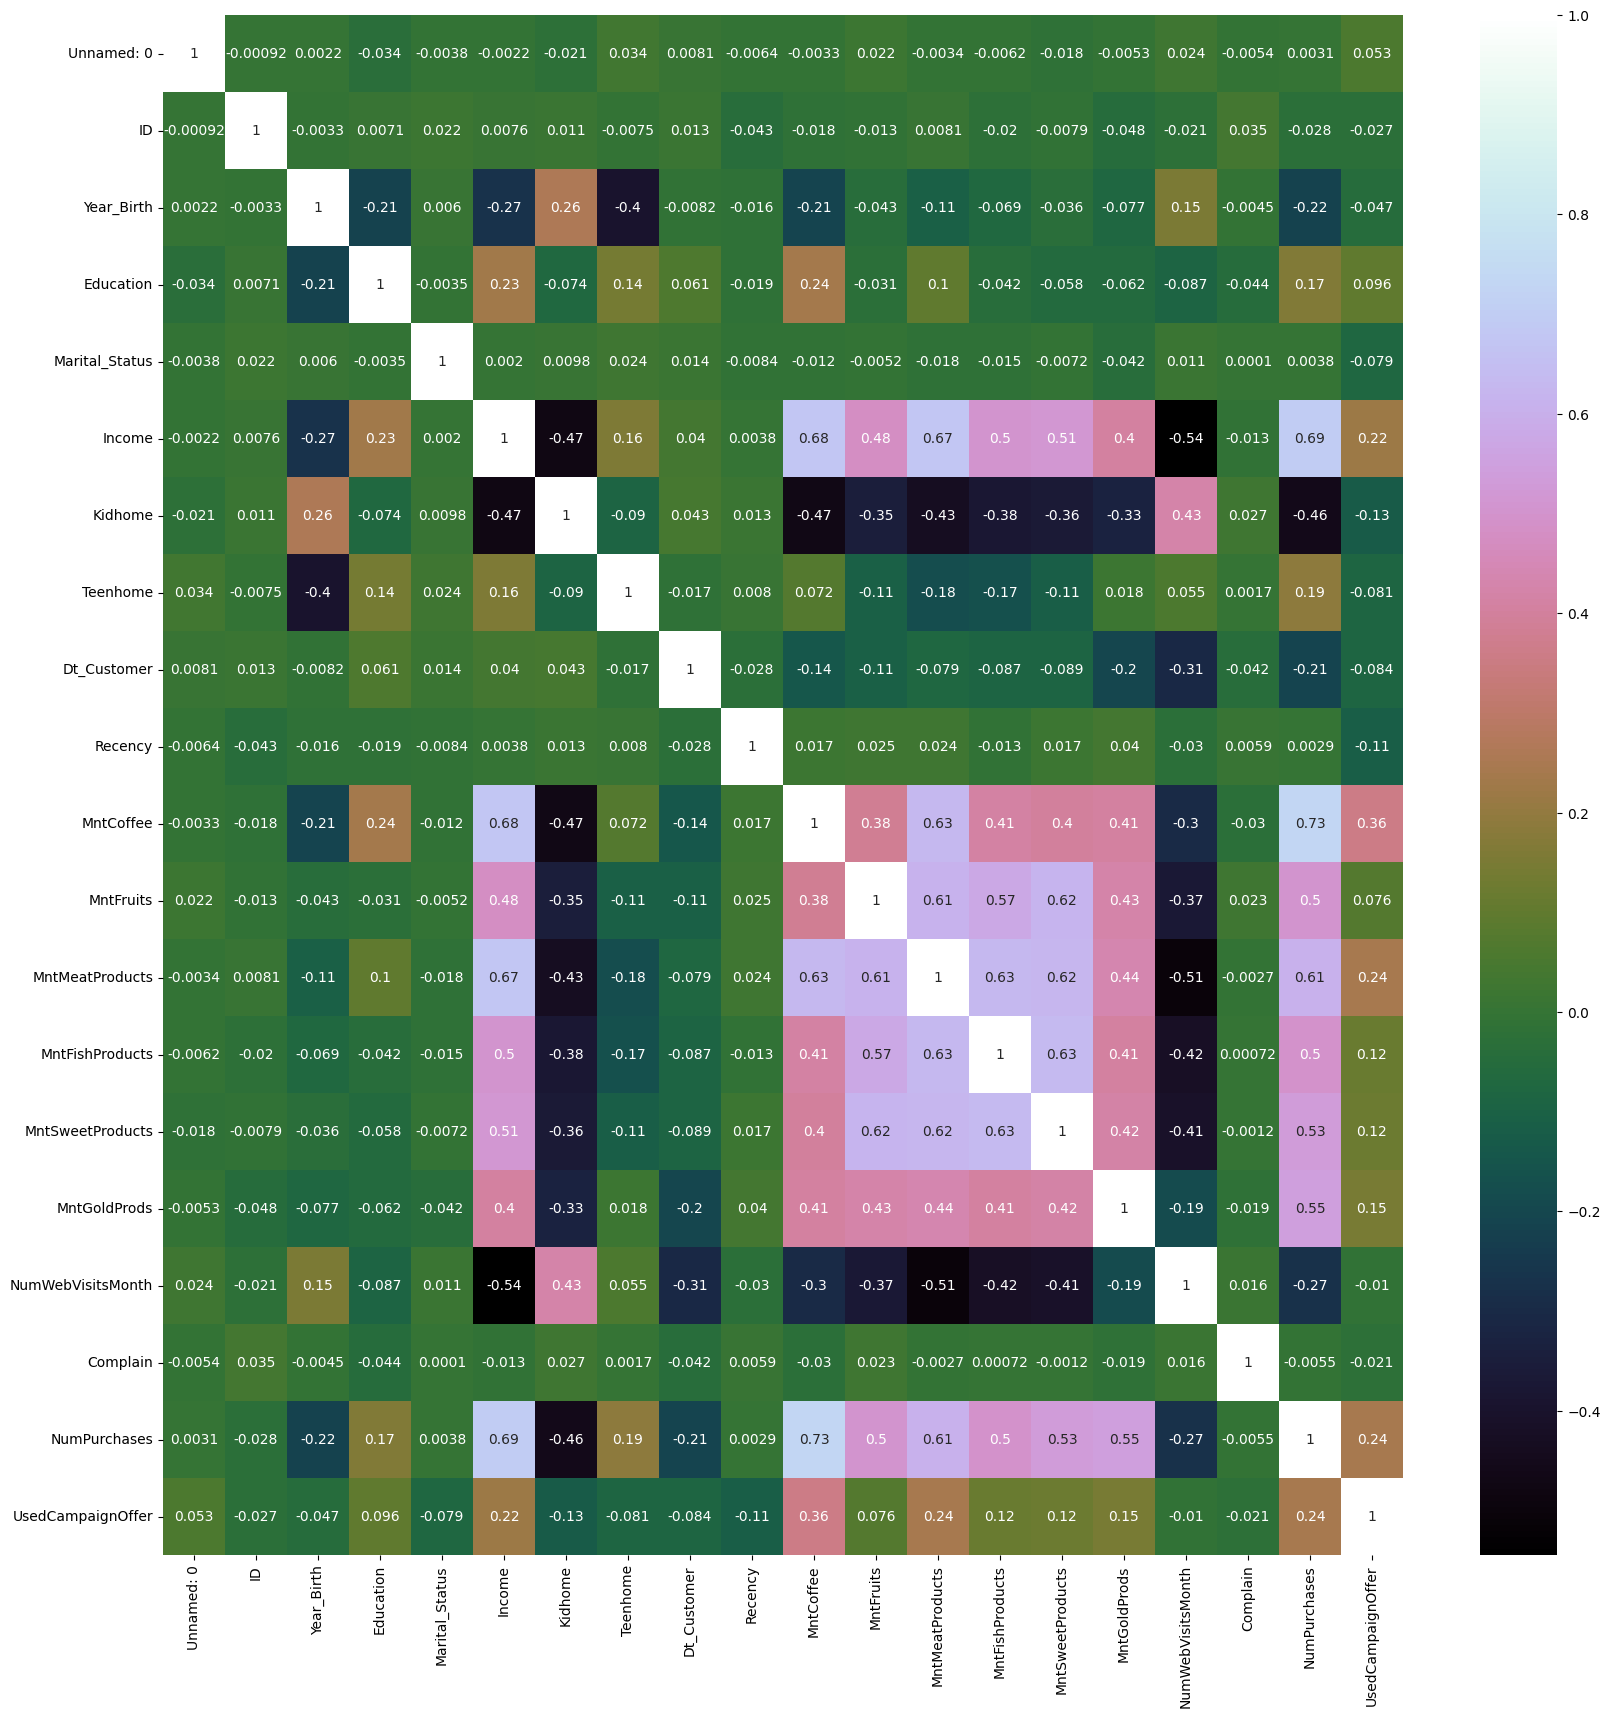

In [607]:
import seaborn as sns
corr_mat = data_frame.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap='cubehelix')
plt.show()

In [608]:
data_frame_norm = copy.deepcopy(data_frame)
data_frame_norm['Year_Birth'] = (data_frame_norm['Year_Birth'] - data_frame_norm['Year_Birth'].min()) / (data_frame_norm['Year_Birth'].max() - data_frame_norm['Year_Birth'].min())
data_frame_norm['Education'] = (data_frame_norm['Education'] - data_frame_norm['Education'].min()) / (data_frame_norm['Education'].max() - data_frame_norm['Education'].min())
data_frame_norm['Income'] = (data_frame_norm['Income'] - data_frame_norm['Income'].min()) / (data_frame_norm['Income'].max() - data_frame_norm['Income'].min())
data_frame_norm['Kidhome'] = (data_frame_norm['Kidhome'] - data_frame_norm['Kidhome'].min()) / (data_frame_norm['Kidhome'].max() - data_frame_norm['Kidhome'].min())
data_frame_norm['Teenhome'] = (data_frame_norm['Teenhome'] - data_frame_norm['Teenhome'].min()) / (data_frame_norm['Teenhome'].max() - data_frame_norm['Teenhome'].min())
data_frame_norm['Dt_Customer'] = (data_frame_norm['Dt_Customer'] - data_frame_norm['Dt_Customer'].min()) / (data_frame_norm['Dt_Customer'].max() - data_frame_norm['Dt_Customer'].min())
data_frame_norm['Recency'] = (data_frame_norm['Recency'] - data_frame_norm['Recency'].min()) / (data_frame_norm['Recency'].max() - data_frame_norm['Recency'].min())
data_frame_norm['MntCoffee'] = (data_frame_norm['MntCoffee'] - data_frame_norm['MntCoffee'].min()) / (data_frame_norm['MntCoffee'].max() - data_frame_norm['MntCoffee'].min())
data_frame_norm['MntFruits'] = (data_frame_norm['MntFruits'] - data_frame_norm['MntFruits'].min()) / (data_frame_norm['MntFruits'].max() - data_frame_norm['MntFruits'].min())
data_frame_norm['MntMeatProducts'] = (data_frame_norm['MntMeatProducts'] - data_frame_norm['MntMeatProducts'].min()) / (data_frame_norm['MntMeatProducts'].max() - data_frame_norm['MntMeatProducts'].min())
data_frame_norm['MntFishProducts'] = (data_frame_norm['MntFishProducts'] - data_frame_norm['MntFishProducts'].min()) / (data_frame_norm['MntFishProducts'].max() - data_frame_norm['MntFishProducts'].min())
data_frame_norm['MntSweetProducts'] = (data_frame_norm['MntSweetProducts'] - data_frame_norm['MntSweetProducts'].min()) / (data_frame_norm['MntSweetProducts'].max() - data_frame_norm['MntSweetProducts'].min())
data_frame_norm['MntGoldProds'] = (data_frame_norm['MntGoldProds'] - data_frame_norm['MntGoldProds'].min()) / (data_frame_norm['MntGoldProds'].max() - data_frame_norm['MntGoldProds'].min())
data_frame_norm['NumWebVisitsMonth'] = (data_frame_norm['NumWebVisitsMonth'] - data_frame_norm['NumWebVisitsMonth'].min()) / (data_frame_norm['NumWebVisitsMonth'].max() - data_frame_norm['NumWebVisitsMonth'].min())
data_frame_norm['NumPurchases'] = (data_frame_norm['NumPurchases'] - data_frame_norm['NumPurchases'].min()) / (data_frame_norm['NumPurchases'].max() - data_frame_norm['NumPurchases'].min())

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [609]:
def simple_linear_regression(input_feature, output):
  x_mean = np.mean(input_feature) 
  y_mean = np.mean(output)
  numerator_sum = 0
  denominator_sum = 0
  for i in range(len(input_feature)):
    numerator_sum += (input_feature[i] - x_mean) * (output[i] - y_mean)
    denominator_sum += (input_feature[i] - x_mean)**2
  alpha = numerator_sum / denominator_sum
  beta = y_mean - alpha*x_mean
  return alpha, beta

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [610]:
def get_regression_predictions(input_feature, bias, slope):
  predictions = np.zeros(len(input_feature))
  for i in range(len(input_feature)):
    predictions[i] = bias + slope * input_feature[i]
  return predictions

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [611]:
def get_root_mean_square_error(predicted_values, outputs):
  mean_square_sum = 0
  for predict, actual in zip(predicted_values, outputs):
    error = actual - predict
    mean_square_sum += error**2
  mean_square_sum = mean_square_sum/len(predicted_values)
  sqrt_mean_square = np.sqrt(mean_square_sum)
  return sqrt_mean_square

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [612]:
def get_r2_score(predicted_values, outputs):
    actual_mean = np.mean(outputs)
    actual_and_predict_sum = 0
    actual_and_mean_sum = 0
    for predict, actual in zip(predicted_values, outputs):
        actual_and_predict_sum += (actual - predict)**2
        actual_and_mean_sum += (actual - actual_mean)**2
    return (1 - (actual_and_predict_sum/actual_and_mean_sum))

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [613]:
#Creat test and train samples.

count_data = data_frame_norm.shape[0]
data_frame_norm_test = data_frame_norm[:round(0.2 * count_data)]
data_frame_norm_train = data_frame_norm[round(0.2 * count_data):] 

In [614]:
designated_feature_list = [] # ToDo

a_coffee, b_coffee = simple_linear_regression(data_frame_norm_train['MntCoffee'].to_list(), data_frame_norm_train['NumPurchases'].to_list())
a_income, b_income = simple_linear_regression(data_frame_norm_train['Income'].to_list(), data_frame_norm_train['NumPurchases'].to_list())
a_meat, b_meat = simple_linear_regression(data_frame_norm_train['MntMeatProducts'].to_list(), data_frame_norm_train['NumPurchases'].to_list())
a_gold, b_gold = simple_linear_regression(data_frame_norm_train['MntGoldProds'].to_list(), data_frame_norm_train['NumPurchases'].to_list())

coffee_predictions = get_regression_predictions(data_frame_norm_test['MntCoffee'].to_list(), b_coffee, a_coffee)
income_predictions = get_regression_predictions(data_frame_norm_test['Income'].to_list(), b_income, a_income)
meat_predictions = get_regression_predictions(data_frame_norm_test['MntMeatProducts'].to_list(), b_meat, a_meat)
gold_predictions = get_regression_predictions(data_frame_norm_test['MntGoldProds'].to_list(), b_gold, a_gold)

coffee_rmse = get_root_mean_square_error(coffee_predictions, data_frame_norm_test['NumPurchases'].to_list())
income_rmse = get_root_mean_square_error(income_predictions, data_frame_norm_test['NumPurchases'].to_list())
meat_rmse = get_root_mean_square_error(meat_predictions, data_frame_norm_test['NumPurchases'].to_list())
gold_rmse = get_root_mean_square_error(gold_predictions, data_frame_norm_test['NumPurchases'].to_list())

coffee_r2 = get_r2_score(coffee_predictions, data_frame_norm_test['NumPurchases'].to_list())
income_r2 = get_r2_score(income_predictions, data_frame_norm_test['NumPurchases'].to_list())
meat_r2 = get_r2_score(meat_predictions, data_frame_norm_test['NumPurchases'].to_list())
gold_r2 = get_r2_score(gold_predictions, data_frame_norm_test['NumPurchases'].to_list())

print('Coffee RMSE: ', coffee_rmse)
print('Income RMSE: ', income_rmse)
print('Meat RMSE: ', meat_rmse)
print('Gold RMSE: ', gold_rmse)
print()
print('Coffee R2: ', coffee_r2)
print('Income R2: ', income_r2)
print('Meat R2: ', meat_r2)
print('Gold R2: ', gold_r2)
# ToDo
#  measure the performance of the simple linear regression model

Coffee RMSE:  0.1448308191570742
Income RMSE:  0.1547693325030975
Meat RMSE:  0.17574508951712609
Gold RMSE:  0.18395309768400406

Coffee R2:  0.5689825064433649
Income R2:  0.5077987162346336
Meat R2:  0.3653426389985498
Gold R2:  0.304676137348007


# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [615]:
def predict_output(feature_matrix, weights, bias):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights) + bias  
    return predictions

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [616]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [617]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    weights = initial_weights
    bias_updated = bias
    while True:
        predictions = predict_output(feature_matrix, weights, bias_updated)
        errors = predictions - outputs
        bias_gradient = 2 * np.sum(errors)
        gradients = []
        for i in range(len(weights)):
            feature = feature_matrix[:, i]
            gradient = feature_derivative(errors, feature)
            gradients.append(gradient)

        gradients_arr = np.array(gradients)
        magnitude = np.linalg.norm(gradients_arr)
        bias_updated = bias_updated - step_size * bias_gradient
        if magnitude < tolerance:
            break
        weights = weights - step_size * gradients_arr

    return weights, bias_updated

In [618]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    #  Explain your answer.
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    #chosen_feature_dataframe = train_x[chosen_features]
    chosen_feature_dataframe = copy.deepcopy(data_frame_norm_train[chosen_features])

    # ToDo
    #  Why are the features normalized?
    chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = copy.deepcopy(data_frame_norm_train['NumPurchases'])
    #target_column = train_y
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

### Would selecting different initial weights make any difference?
Yes, due to the existence of local minimum, sometimes changing the initial weights may lead to better or worse results.

### Why are the features normalized?
We normalize features so that we can get better results and converge to the solution faster.

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [619]:
chosen_features = ['MntCoffee', 'Income'] # ToDo

chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)
print(bias)
print(train_weights)

# ToDo
# compute the chosen_feature_matrix, train_weights, and bias

0.385177692102149
[0.10598047 0.08163492]


In [620]:
chosen_features_copy = copy.deepcopy(data_frame_norm_test[chosen_features])
test_data = normalize_features(chosen_features, chosen_features_copy)
chosen_feature_matrix = test_data.to_numpy()
predictions = predict_output(chosen_feature_matrix, train_weights, bias)

#ToDo
# compute the predictions

In [621]:
R22 = get_r2_score(predictions, data_frame_norm_test['NumPurchases'].to_list())
RMSE2 = get_root_mean_square_error(predictions, data_frame_norm_test['NumPurchases'].to_list())
print("R2 for Two Features: ", R22)
print("RMSE for Two Features: ", RMSE2)
#ToDo
# Calculate the R2 score and mean square error
# Explain the results

R2 for Two Features:  0.6291575881985123
RMSE for Two Features:  0.13434089488559806


### Explain the results
As you can see, the R2 Score has increased compared to simple regression and moved closer to 1. Also, the RMSE has decreased compared to simple regression and moved closer to 0. As a result, the performance of this model is better.

## Three Feature Regression

Now repeat the steps for 3 features

In [622]:
chosen_features = ['MntCoffee', 'Income', 'MntGoldProds']
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)
chosen_features_copy = copy.deepcopy(data_frame_norm_test[chosen_features])
test_data = normalize_features(chosen_features, chosen_features_copy)
chosen_feature_matrix = test_data.to_numpy()
predictions = predict_output(chosen_feature_matrix, train_weights, bias)
R23 = get_r2_score(predictions, data_frame_norm_test['NumPurchases'].to_list())
RMSE3 = get_root_mean_square_error(predictions, data_frame_norm_test['NumPurchases'].to_list())
print("R2 for Three Features: ", R23)
print("RMSE for Three Features: ", RMSE3)
# ToDo

R2 for Three Features:  0.6688564171974868
RMSE for Three Features:  0.12694678604218154


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [623]:
chosen_features = ['MntCoffee', 'Income', 'MntGoldProds', 'Teenhome', 'MntFishProducts']
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)
chosen_features_copy = copy.deepcopy(data_frame_norm_test[chosen_features])
test_data = normalize_features(chosen_features, chosen_features_copy)
chosen_feature_matrix = test_data.to_numpy()
predictions = predict_output(chosen_feature_matrix, train_weights, bias)
R25 = get_r2_score(predictions, data_frame_norm_test['NumPurchases'].to_list())
RMSE5 = get_root_mean_square_error(predictions, data_frame_norm_test['NumPurchases'].to_list())
print("R2 for Five Features: ", R25)
print("RMSE for Five Features: ", RMSE5)
# ToDo

R2 for Five Features:  0.7065922067550526
RMSE for Five Features:  0.11949489748596472


### Explain the results
As you can see, the R2 Score has increased compared to Two or Three regression models and moved closer to 1. Also, the RMSE has decreased compared to Two or Three regression models and moved closer to 0. As a result, the performance of this model is better. 
The difference is because we used more features for regression. However, it should be noted that if we increase the number of features beyond a certain point, the results will get worse due to overfitting.

# Phase 3:

In [624]:
data_frame_norm_p3 = copy.deepcopy(data_frame_norm)
num_purchases_median = data_frame_norm_p3['NumPurchases'].median()
data_frame_norm_p3['PurchaseRate'] = ['HIGH' if x > num_purchases_median else 'LOW' for x in data_frame_norm_p3['NumPurchases']]
#Creat test and train samples.
count_data = data_frame_norm_p3.shape[0]
data_frame_norm_p3_test = data_frame_norm_p3[:round(0.2 * count_data)]
data_frame_norm_p3_train = data_frame_norm_p3[round(0.2 * count_data):] 

In [625]:
from sklearn.model_selection import GridSearchCV

def grid_search_cv(model, parameters, x, y):
  grid = GridSearchCV(model, parameters, cv=5)
  grid.fit(x, y)
  best_model = grid.best_estimator_
  return best_model

In [626]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(predictions, true_values):
    mat = confusion_matrix(true_values, predictions)
    print(mat)
    true_pos = mat[0][0]
    false_pos = mat[0][1]
    false_neg = mat[1][0]
    true_neg = mat[1][1]
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_neg + false_pos)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    f1_score = (2*true_pos) / (2*true_pos + false_neg + false_pos)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 score: ', f1_score)

def calculate_accuracy(predictions, true_values):
    mat = confusion_matrix(true_values, predictions)
    true_pos = mat[0][0]
    false_pos = mat[0][1]
    false_neg = mat[1][0]
    true_neg = mat[1][1]
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_neg + false_pos)
    return accuracy

In [627]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [628]:
x = data_frame_norm_p3_train.drop(['PurchaseRate', 'NumPurchases'], axis=1) 
y = data_frame_norm_p3_train['PurchaseRate']
x_test = data_frame_norm_p3_test.drop(['PurchaseRate', 'NumPurchases'], axis=1)  

In [629]:
#Decision Tree:

model_decision_tree = DecisionTreeClassifier()
parameters = {
    'min_samples_leaf': [2, 6, 10],
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 6, 10]
}
model_decision_tree = grid_search_cv(model_decision_tree, parameters, x, y)
y_predictions = model_decision_tree.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[167  12]
 [  6 200]]
Accuracy:  0.9532467532467532
Precision:  0.9329608938547486
Recall:  0.9653179190751445
F1 score:  0.9488636363636364


[Text(0.5, 0.9166666666666666, 'x[10] <= 0.105\ngini = 0.5\nsamples = 1541\nvalue = [755, 786]'),
 Text(0.3125, 0.75, 'x[12] <= 0.119\ngini = 0.092\nsamples = 705\nvalue = [34, 671]'),
 Text(0.20833333333333334, 0.5833333333333334, 'x[11] <= 0.423\ngini = 0.035\nsamples = 676\nvalue = [12, 664]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[12] <= 0.084\ngini = 0.021\nsamples = 671\nvalue = [7, 664]'),
 Text(0.08333333333333333, 0.25, 'x[12] <= 0.074\ngini = 0.003\nsamples = 641\nvalue = [1, 640]'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.0\nsamples = 625\nvalue = [0, 625]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.25, 0.25, 'x[12] <= 0.092\ngini = 0.32\nsamples = 30\nvalue = [6, 24]'),
 Text(0.20833333333333334, 0.08333333333333333, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2916666666666667, 0.08333333333333333, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.25, 0.4166666666666667, 'gini = 0

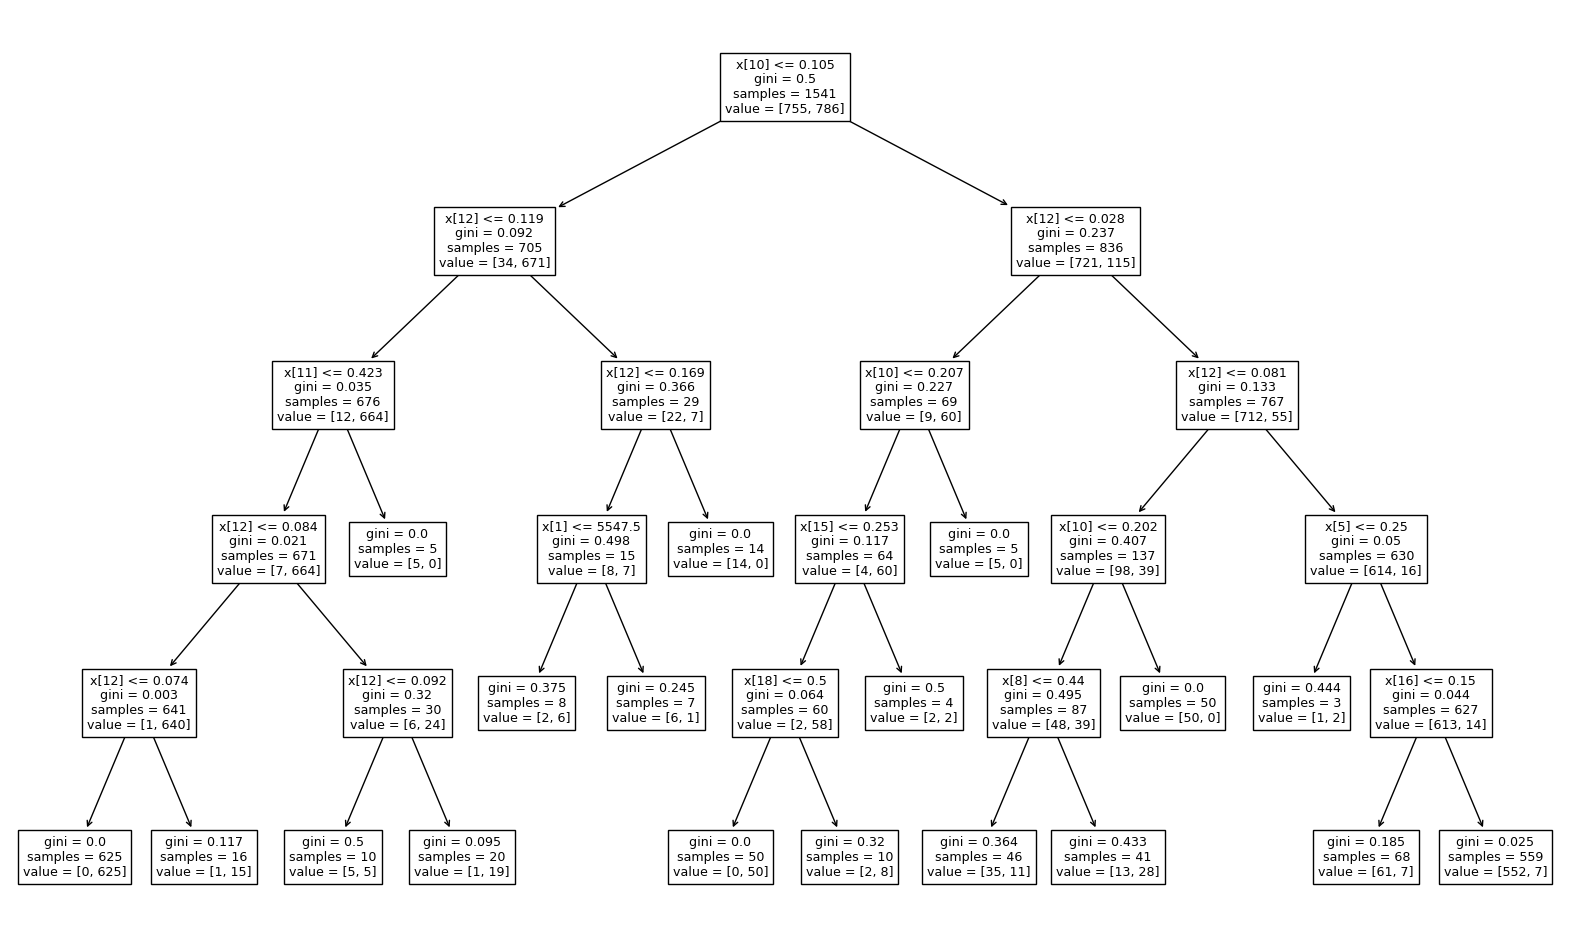

In [630]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 12))
plot_tree(model_decision_tree) 

In [631]:
#K Neighbors :

model_knn = KNeighborsClassifier() 
parameters = {'n_neighbors': [3, 5, 7, 9]}
model_knn = grid_search_cv(model_knn, parameters, x, y)
y_predictions = model_knn.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[ 91  88]
 [118  88]]
Accuracy:  0.4649350649350649
Precision:  0.5083798882681564
Recall:  0.4354066985645933
F1 score:  0.4690721649484536


In [632]:
#Logistic Regression :

model_logistic = LogisticRegression() 
parameters = {
    'tol': [1e-4, 1e-6],
    'fit_intercept': [False, True],
    'max_iter': [400, 600, 800, 1000],
    'intercept_scaling': [10, 50, 100]
}
model_logistic = grid_search_cv(model_logistic, parameters, x, y)
y_predictions = model_logistic.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[167  12]
 [ 15 191]]
Accuracy:  0.9298701298701298
Precision:  0.9329608938547486
Recall:  0.9175824175824175
F1 score:  0.925207756232687


In [633]:
#Random Forest :

parameters = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 7, 9]
}
model_rf = RandomForestClassifier() 
model_rf = grid_search_cv(model_rf, parameters, x, y)
y_predictions = model_rf.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[170   9]
 [  6 200]]
Accuracy:  0.961038961038961
Precision:  0.9497206703910615
Recall:  0.9659090909090909
F1 score:  0.9577464788732394


Text(0, 0.5, 'Accuracy')

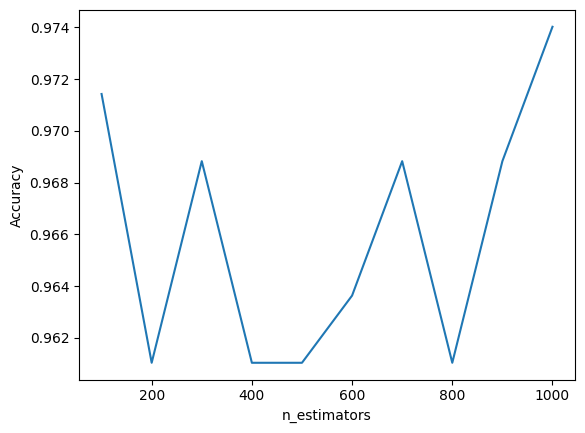

In [634]:
param_n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
param_n_estimators_accuracy = []
for i in range(len(param_n_estimators)):
    model_rf = RandomForestClassifier(n_estimators=param_n_estimators[i])
    model_rf.fit(x, y)
    y_predictions = model_rf.predict(x_test)
    param_n_estimators_accuracy.append(calculate_accuracy(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list()))

plt.plot(param_n_estimators, param_n_estimators_accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

As you can see, the best accuracy is achieved when we use n_estimators = 700. However, we do not see a clear continuous relationship between accuracy and n_estimators across the full range of values plotted. The accuracy does not consistently improve as n_estimators increases. This is likely because the effect of n_estimators on accuracy plateaus after a certain point for this dataset and model. 

Text(0, 0.5, 'Accuracy')

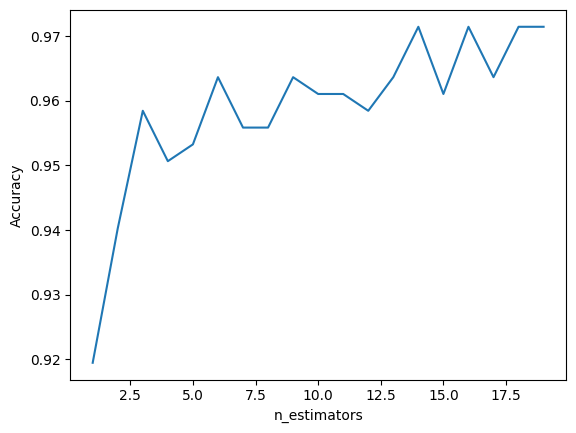

In [635]:
param_max_depth = [i for i in range(1, 20)]
param_max_depth_accuracy = []
for i in range(len(param_max_depth)):
    model_rf = RandomForestClassifier(max_depth=param_max_depth[i])
    model_rf.fit(x, y)
    y_predictions = model_rf.predict(x_test)
    param_max_depth_accuracy.append(calculate_accuracy(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list()))

plt.plot(param_max_depth, param_max_depth_accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [636]:
privacy_features = ['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntCoffee', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'NumPurchases']
data_frame_noise = copy.deepcopy(data_frame_norm_p3)
noise = np.random.laplace(loc=0, scale=0.05, size=(data_frame_noise.shape[0], len(privacy_features)))
data_frame_noise[privacy_features] += noise

In [637]:
data_frame_noise_norm = copy.deepcopy(data_frame_noise)
data_frame_noise_norm['Year_Birth'] = (data_frame_noise_norm['Year_Birth'] - data_frame_noise_norm['Year_Birth'].min()) / (data_frame_noise_norm['Year_Birth'].max() - data_frame_noise_norm['Year_Birth'].min())
data_frame_noise_norm['Education'] = (data_frame_noise_norm['Education'] - data_frame_noise_norm['Education'].min()) / (data_frame_noise_norm['Education'].max() - data_frame_noise_norm['Education'].min())
data_frame_noise_norm['Income'] = (data_frame_noise_norm['Income'] - data_frame_noise_norm['Income'].min()) / (data_frame_noise_norm['Income'].max() - data_frame_noise_norm['Income'].min())
data_frame_noise_norm['Kidhome'] = (data_frame_noise_norm['Kidhome'] - data_frame_noise_norm['Kidhome'].min()) / (data_frame_noise_norm['Kidhome'].max() - data_frame_noise_norm['Kidhome'].min())
data_frame_noise_norm['Teenhome'] = (data_frame_noise_norm['Teenhome'] - data_frame_noise_norm['Teenhome'].min()) / (data_frame_noise_norm['Teenhome'].max() - data_frame_noise_norm['Teenhome'].min())
data_frame_noise_norm['Dt_Customer'] = (data_frame_noise_norm['Dt_Customer'] - data_frame_noise_norm['Dt_Customer'].min()) / (data_frame_noise_norm['Dt_Customer'].max() - data_frame_noise_norm['Dt_Customer'].min())
data_frame_noise_norm['Recency'] = (data_frame_noise_norm['Recency'] - data_frame_noise_norm['Recency'].min()) / (data_frame_noise_norm['Recency'].max() - data_frame_noise_norm['Recency'].min())
data_frame_noise_norm['MntCoffee'] = (data_frame_noise_norm['MntCoffee'] - data_frame_noise_norm['MntCoffee'].min()) / (data_frame_noise_norm['MntCoffee'].max() - data_frame_noise_norm['MntCoffee'].min())
data_frame_noise_norm['MntFruits'] = (data_frame_noise_norm['MntFruits'] - data_frame_noise_norm['MntFruits'].min()) / (data_frame_noise_norm['MntFruits'].max() - data_frame_noise_norm['MntFruits'].min())
data_frame_noise_norm['MntMeatProducts'] = (data_frame_noise_norm['MntMeatProducts'] - data_frame_noise_norm['MntMeatProducts'].min()) / (data_frame_noise_norm['MntMeatProducts'].max() - data_frame_noise_norm['MntMeatProducts'].min())
data_frame_noise_norm['MntFishProducts'] = (data_frame_noise_norm['MntFishProducts'] - data_frame_noise_norm['MntFishProducts'].min()) / (data_frame_noise_norm['MntFishProducts'].max() - data_frame_noise_norm['MntFishProducts'].min())
data_frame_noise_norm['MntSweetProducts'] = (data_frame_noise_norm['MntSweetProducts'] - data_frame_noise_norm['MntSweetProducts'].min()) / (data_frame_noise_norm['MntSweetProducts'].max() - data_frame_noise_norm['MntSweetProducts'].min())
data_frame_noise_norm['MntGoldProds'] = (data_frame_noise_norm['MntGoldProds'] - data_frame_noise_norm['MntGoldProds'].min()) / (data_frame_noise_norm['MntGoldProds'].max() - data_frame_noise_norm['MntGoldProds'].min())
data_frame_noise_norm['NumWebVisitsMonth'] = (data_frame_noise_norm['NumWebVisitsMonth'] - data_frame_noise_norm['NumWebVisitsMonth'].min()) / (data_frame_noise_norm['NumWebVisitsMonth'].max() - data_frame_noise_norm['NumWebVisitsMonth'].min())
data_frame_noise_norm['NumPurchases'] = (data_frame_noise_norm['NumPurchases'] - data_frame_noise_norm['NumPurchases'].min()) / (data_frame_noise_norm['NumPurchases'].max() - data_frame_noise_norm['NumPurchases'].min())

In [638]:
num_purchases_median = data_frame_noise_norm['NumPurchases'].median()
data_frame_noise_norm['PurchaseRate'] = ['HIGH' if x > num_purchases_median else 'LOW' for x in data_frame_noise_norm['NumPurchases']]
#Creat test and train samples.
count_data = data_frame_noise_norm.shape[0]
data_frame_norm_noise_test = data_frame_noise_norm[:round(0.2 * count_data)]
data_frame_norm_noise_train = data_frame_noise_norm[round(0.2 * count_data):] 

In [639]:
x = data_frame_norm_noise_train.drop(['PurchaseRate', 'NumPurchases'], axis=1) 
y = data_frame_norm_noise_train['PurchaseRate']
x_test = data_frame_norm_noise_test.drop(['PurchaseRate', 'NumPurchases'], axis=1)  

In [640]:
#Decision Tree:

model_decision_tree = DecisionTreeClassifier()
parameters = {
    'min_samples_leaf': [2, 6, 10],
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 6, 10]
}
model_decision_tree = grid_search_cv(model_decision_tree, parameters, x, y)
y_predictions = model_decision_tree.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[163  16]
 [ 20 186]]
Accuracy:  0.9064935064935065
Precision:  0.9106145251396648
Recall:  0.8907103825136612
F1 score:  0.9005524861878453


[Text(0.49264705882352944, 0.9166666666666666, 'x[10] <= 0.271\ngini = 0.5\nsamples = 1541\nvalue = [782, 759]'),
 Text(0.27205882352941174, 0.75, 'x[13] <= 0.381\ngini = 0.234\nsamples = 681\nvalue = [92, 589]'),
 Text(0.19117647058823528, 0.5833333333333334, 'x[14] <= 0.393\ngini = 0.177\nsamples = 643\nvalue = [63, 580]'),
 Text(0.11764705882352941, 0.4166666666666667, 'x[15] <= 0.367\ngini = 0.148\nsamples = 597\nvalue = [48, 549]'),
 Text(0.058823529411764705, 0.25, 'x[10] <= 0.232\ngini = 0.126\nsamples = 563\nvalue = [38, 525]'),
 Text(0.029411764705882353, 0.08333333333333333, 'gini = 0.081\nsamples = 427\nvalue = [18, 409]'),
 Text(0.08823529411764706, 0.08333333333333333, 'gini = 0.251\nsamples = 136\nvalue = [20, 116]'),
 Text(0.17647058823529413, 0.25, 'x[12] <= 0.299\ngini = 0.415\nsamples = 34\nvalue = [10, 24]'),
 Text(0.14705882352941177, 0.08333333333333333, 'gini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(0.20588235294117646, 0.08333333333333333, 'gini = 0.463\ns

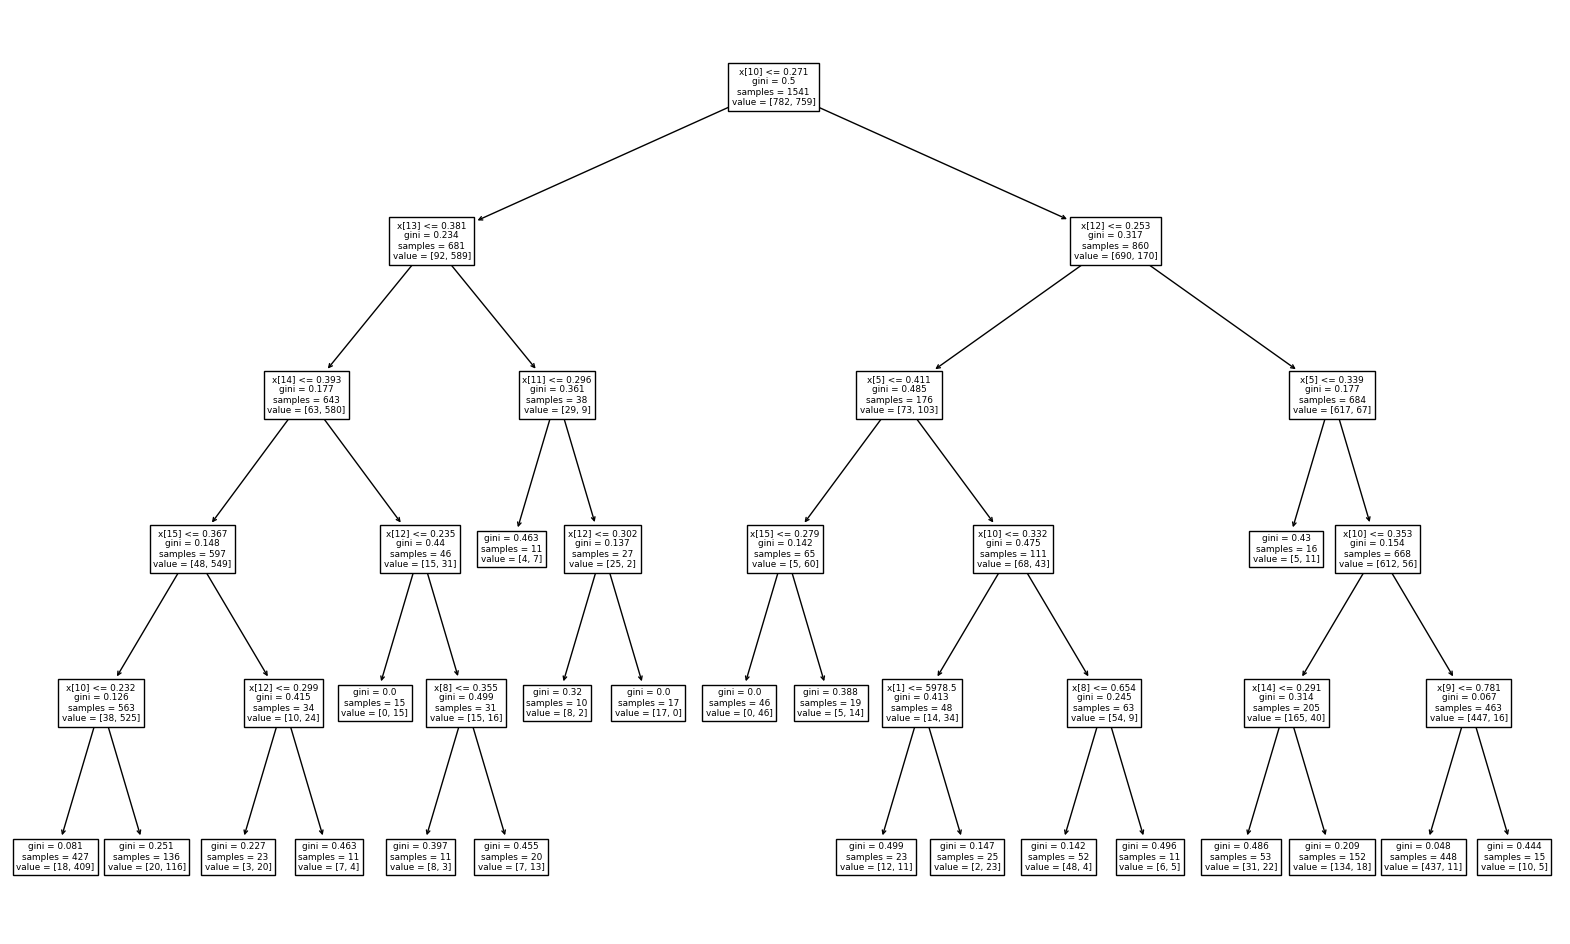

In [641]:
plt.figure(figsize=(20, 12))
plot_tree(model_decision_tree) 

In [642]:
#K Neighbors :

model_knn = KNeighborsClassifier() 
parameters = {'n_neighbors': [3, 5, 7, 9]}
model_knn = grid_search_cv(model_knn, parameters, x, y)
y_predictions = model_knn.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[ 90  89]
 [123  83]]
Accuracy:  0.44935064935064933
Precision:  0.5027932960893855
Recall:  0.4225352112676056
F1 score:  0.45918367346938777


In [643]:
#Logistic Regression :

model_logistic = LogisticRegression() 
parameters = {
    'tol': [1e-4, 1e-6],
    'fit_intercept': [False, True],
    'max_iter': [400, 600, 800, 1000],
    'intercept_scaling': [10, 50, 100]
}
model_logistic = grid_search_cv(model_logistic, parameters, x, y)
y_predictions = model_logistic.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[158  21]
 [ 36 170]]
Accuracy:  0.8519480519480519
Precision:  0.88268156424581
Recall:  0.8144329896907216
F1 score:  0.8471849865951743


In [644]:
#Random Forest :

parameters = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 7, 9]
}
model_rf = RandomForestClassifier() 
model_rf = grid_search_cv(model_rf, parameters, x, y)
y_predictions = model_rf.predict(x_test)

print_confusion_matrix(y_predictions, data_frame_norm_p3_test['PurchaseRate'].to_list())

[[168  11]
 [ 15 191]]
Accuracy:  0.9324675324675324
Precision:  0.9385474860335196
Recall:  0.9180327868852459
F1 score:  0.9281767955801105


# Bonus:

In [645]:
data_frame_norm_p4 = copy.deepcopy(data_frame_norm)
data_frame_norm_p4["Marital_Status"] = data_frame_norm_p4["Marital_Status"].astype(float)
num_purchases_median = data_frame_norm_p4['NumPurchases'].median()
data_frame_norm_p4['PurchaseRate'] = [1 if x > num_purchases_median else 0 for x in data_frame_norm_p4['NumPurchases']]
count_data = data_frame_norm_p4.shape[0]
data_frame_norm_p4_test = data_frame_norm_p4[:round(0.2 * count_data)]
data_frame_norm_p4_train = data_frame_norm_p4[round(0.2 * count_data):] 
x = data_frame_norm_p4_train.drop(['PurchaseRate', 'NumPurchases'], axis=1) 
y = data_frame_norm_p4_train['PurchaseRate']
x_test = data_frame_norm_p4_test.drop(['PurchaseRate', 'NumPurchases'], axis=1)  

In [647]:
import xgboost as xgb

parameters = {
    "objective": ["binary:logistic"],
    "eval_metric": ["logloss"],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500, 700] 
}
model = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=parameters)
model.fit(x, y) 
y_predictions = model.predict(x_test)
y_predictions = np.where(y_predictions > 0.5, 1, 0)
print_confusion_matrix(y_predictions, data_frame_norm_p4_test['PurchaseRate'].to_list())

[[204   2]
 [  9 170]]
Accuracy:  0.9714285714285714
Precision:  0.9902912621359223
Recall:  0.9577464788732394
F1 score:  0.9737470167064439
